# Exploratory Data Analysis

- [Accéder aux bases](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/)
- [Accéder à la documentation](https://www.data.gouv.fr/fr/datasets/r/8ef4c2a3-91a0-4d98-ae3a-989bde87b62a)

# Objectifs : prédire la gravité d'un accident

La gravité d'un accident est codée par la variable `grav`, présente (uniquement) dans la base _usagers_, qui peut prendre les valeurs suivantes :
- 1 : indemne ;
- 2 : tué ;
- 3 : blessé hospitalisé ;
- 4 : blessé léger.

On charge dans un premier temps tous les packages nécessaires.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sur data.gouv, quatre bases de données sont publiées annuellement. Elles concernent : les usages, les véhicules, les lieux et les caractéristiques. Nous chargeons ci-dessous les quatre bases de 2021 (les plus récentes).

In [2]:
df_usagers_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/62c20524-d442-46f5-bfd8-982c59763ec8", sep=";")
df_vehicules_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/c9742921-4427-41e5-81bc-f13af8bc31a0", sep=";")
df_lieux_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/a6ef711a-1f03-44cb-921a-0ce8ec975995", sep=";")
df_caracs_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/5fc299c0-4598-4c29-b74c-6a67b0cc27e7", sep=";")

df_usagers_21 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/ba5a1956-7e82-41b7-a602-89d7dd484d7a", sep=";")
df_vehicules_21 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/0bb5953a-25d8-46f8-8c25-b5c2f5ba905e", sep=";")
df_lieux_21 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/8a4935aa-38cd-43af-bf10-0209d6d17434", sep=";")
df_caracs_21 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/85cfdc0c-23e4-4674-9bcd-79a970d7269b", sep=";")

df_usagers_20 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/78c45763-d170-4d51-a881-e3147802d7ee", sep=";")
df_vehicules_20 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/a66be22f-c346-49af-b196-71df24702250", sep=";")
df_lieux_20 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e85c41f7-d4ea-4faf-877f-ab69a620ce21", sep=";")
df_caracs_20 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/07a88205-83c1-4123-a993-cba5331e8ae0", sep=";")

df_usagers_19 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028", sep=";")
df_vehicules_19 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/780cd335-5048-4bd6-a841-105b44eb2667", sep=";")
df_lieux_19 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/2ad65965-36a1-4452-9c08-61a6c874e3e6", sep=";")
df_caracs_19 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a", sep=";")

C:\Users\User\AppData\Local\Temp\ipykernel_6676\3262071932.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/a6ef711a-1f03-44cb-921a-0ce8ec975995", sep=";")


In [3]:
from data_cleaning import *

In [4]:
df_usagers_22 = clean_df_usagers(df_usagers_22)
df_vehicules_22 = clean_df_vehicules(df_vehicules_22)
df_lieux_22 = clean_df_lieux(df_lieux_22)
df_caracs_22 = clean_df_caracs(df_caracs_22)

df_usagers_21 = clean_df_usagers(df_usagers_21)
df_vehicules_21 = clean_df_vehicules(df_vehicules_21)
df_lieux_21 = clean_df_lieux(df_lieux_21)
df_caracs_21 = clean_df_caracs(df_caracs_21)

df_usagers_20 = clean_df_usagers(df_usagers_20)
df_vehicules_20 = clean_df_vehicules(df_vehicules_20)
df_lieux_20 = clean_df_lieux(df_lieux_20)
df_caracs_20 = clean_df_caracs(df_caracs_20)

df_usagers_19 = clean_df_usagers(df_usagers_19)
df_vehicules_19 = clean_df_vehicules(df_vehicules_19)
df_lieux_19 = clean_df_lieux(df_lieux_19)
df_caracs_19 = clean_df_caracs(df_caracs_19)

# Jointure

On s'assure qu'on a bien autant d'observations dont le triplet `(Num_Acc, id_vehicule, num_veh)` est unique dans les bases `usagers` et `véhicules`.

In [5]:
(~df_usagers_22.duplicated(["Num_Acc", "id_vehicule", "num_veh"])).sum()

94493

In [6]:
(~df_usagers_22.duplicated(["Num_Acc", "id_vehicule", "num_veh"])).sum()

94493

In [7]:
(~df_vehicules_22.duplicated(["Num_Acc", "id_vehicule", "num_veh"])).sum()

94493

À présent, on peut procéder à la jointure à l'aide de `pd.merge`. On joint d'abord les bases `usagers` et `vehicules` sur `(Num_Acc, id_vehicule, num_veh)`, puis on joint également les bases `lieux` et `caracs` sur l'identifiant de l'accident, codé par `Num_Acc`.

In [8]:
df_merged_22 = pd.merge(pd.merge(pd.merge(df_usagers_22, df_vehicules_22, on=["Num_Acc", "id_vehicule", "num_veh"]), \
    df_lieux_22, on="Num_Acc"), df_caracs_22, on="Num_Acc")

In [9]:
len(df_merged_22)

126662

On retombe bien sur un total de 126 662 observations, soit la longueur de la base usagers.

On fait de même pour les autres années (2021).

In [10]:
df_merged_21 = pd.merge(pd.merge(pd.merge(df_usagers_21, df_vehicules_21, on=["Num_Acc", "id_vehicule", "num_veh"]), \
    df_lieux_21, on="Num_Acc"), df_caracs_21, on="Num_Acc")

df_merged_20 = pd.merge(pd.merge(pd.merge(df_usagers_20, df_vehicules_20, on=["Num_Acc", "id_vehicule", "num_veh"]), \
    df_lieux_20, on="Num_Acc"), df_caracs_20, on="Num_Acc")

df_merged_19 = pd.merge(pd.merge(pd.merge(df_usagers_19, df_vehicules_19, on=["Num_Acc", "id_vehicule", "num_veh"]), \
    df_lieux_19, on="Num_Acc"), df_caracs_19, on="Num_Acc")

In [11]:
df_merged = pd.concat([df_merged_22, df_merged_21, df_merged_20, df_merged_19], ignore_index=True)

In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494182 entries, 0 to 494181
Data columns (total 57 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      494182 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  494182 non-null  object 
 3   num_veh      494182 non-null  object 
 4   place        494157 non-null  float64
 5   catu         494182 non-null  object 
 6   grav         493881 non-null  float64
 7   sexe         488376 non-null  object 
 8   an_nais      488241 non-null  float64
 9   trajet       360809 non-null  object 
 10  secu1        388294 non-null  object 
 11  secu2        59943 non-null   object 
 12  secu3        4029 non-null    object 
 13  locp         277429 non-null  float64
 14  actp         222449 non-null  object 
 15  etatp        37936 non-null   object 
 16  senc         492526 non-null  float64
 17  catv         493108 non-null  float64
 18  obs          493991 non-

# Nettoyages

On élimine l'unique `NaN` de la variable `grav`.

In [13]:
for equipement in ["ceinture", "casque", "dispositif enfants", "gilet réfléchissant",
                   "airbag", "gants", "gants + airbag", "autre"]:
    df_merged[equipement] = df_merged[["secu1", "secu2", "secu3"]].isin([equipement]).any(axis=1)

df_merged["airbag"] = df_merged["airbag"] | df_merged["gants + airbag"]
df_merged["gants"] = df_merged["gants"] | df_merged["gants + airbag"]
df_merged.drop("gants + airbag", axis=1, inplace=True)

In [14]:
df_merged.replace(-1, np.nan, inplace=True)
df_merged.replace("-1", np.nan, inplace=True)
df_merged.replace(" -1", np.nan, inplace=True)

In [15]:
df_merged["grav"].replace({2: 4, 4: 2}, inplace=True)

In [16]:
df_merged.columns

Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor',
       'occutc', 'catv_2', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp',
       'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra',
       'situ', 'vma', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'heure', 'ceinture',
       'casque', 'dispositif enfants', 'gilet réfléchissant', 'airbag',
       'gants', 'autre'],
      dtype='object')

Eliminons d'emblée certaines variables qui ne serviront pas au modèle de prédiction de la gravité.

In [17]:
df_merged.drop(["Num_Acc", "id_usager", "id_vehicule", "num_veh", "voie", "v1", "v2",
                "dep", "com", "adr", "lat", "long", "pr", "pr1", "an"], axis=1, inplace=True)

On peut également enlever `lartpc` et `occutc` qui ont trop de `NaN`.

In [18]:
df_merged.drop(["lartpc", "occutc"], axis=1, inplace=True)

In [19]:
# df_merged.drop("catu", axis=1, inplace=True)

In [20]:
df_merged.columns

Index(['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2',
       'secu3', 'locp', 'actp', 'etatp', 'senc', 'catv', 'obs', 'obsm', 'choc',
       'manv', 'motor', 'catv_2', 'catr', 'circ', 'nbv', 'vosp', 'prof',
       'plan', 'larrout', 'surf', 'infra', 'situ', 'vma', 'jour', 'mois',
       'hrmn', 'lum', 'agg', 'int', 'atm', 'col', 'heure', 'ceinture',
       'casque', 'dispositif enfants', 'gilet réfléchissant', 'airbag',
       'gants', 'autre'],
      dtype='object')

Description des variables
- `place` : place occupée dans le véhicule par l'usager au moment de l'accident ; 1 conducteur, 10 piéton
- `sexe` : sexe de l'usager
- `an_nais` : année de naissance de l'usager
- `trajet` : motif du déplacement au moment de l'accident
- `secu` : présence et utilisation de tel équipement de sécurité
- `locp` : localisation du piéton
- `actp` : action du piéton
- `etatp` : piéton seul, accompagné ou en groupe
- `senc` : sens de circulation
- `catv` : catégorie du véhicule
- `obs` : obstacle fixe heurté
- `obsm` : obstacle mobile heurté
- `choc` : point de choc initial
- `manv` :
- `motor` :
- `catr` :
- `circ` :
- `nbv` :
- `vosp` :
- `prof` :
- `larrout` :
- `surf` :
- `infra` : 
- `situ` :
- `vma` :
- `jour` :
- `mois` :
- `hrmn` :
- `lum` :
- `agg` :
- `int` :
- `atm` :
- `col` :

# Statistiques descriptives

Petit truc qui sera utile pour la suite.

In [21]:
df_non_pieton = df_merged[df_merged["catu"]!="piéton"]
df_pieton = df_merged[df_merged["catu"]=="piéton"]


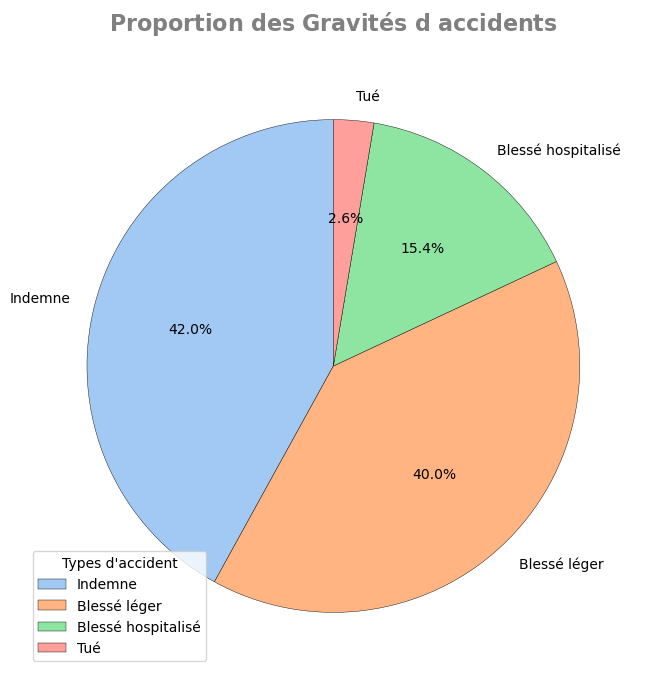

In [22]:
accident_counts = df_merged['grav'].value_counts()
labels_pie_chart = {1: 'Indemne', 2: 'Blessé léger', 3: 'Blessé hospitalisé', 4: 'Tué'}
accident_counts.index = accident_counts.index.map(labels_pie_chart)
colors = sns.color_palette('pastel')  
plt.figure(figsize=(8, 8))
plt.pie(accident_counts, labels=accident_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=1, edgecolor='black', linewidth=0.3)) # dict(width=1)
plt.title(r'$\bf{ Proportion\ des\ Gravités\ d\ accidents}$', fontsize=16, loc='center', pad=20, color='grey')
plt.legend(title='Types d\'accident', loc='lower left', bbox_to_anchor=(0.0005, 0.01))
plt.show() 

### `agg` [++]

On constate que
- la majorité des accidents de gravité 1 et 2 ont lieu en agglomération ;
- la majorité des accidents de gravité 3 et 4 ont lieu hors agglomération.


<Axes: xlabel='agg', ylabel='count'>

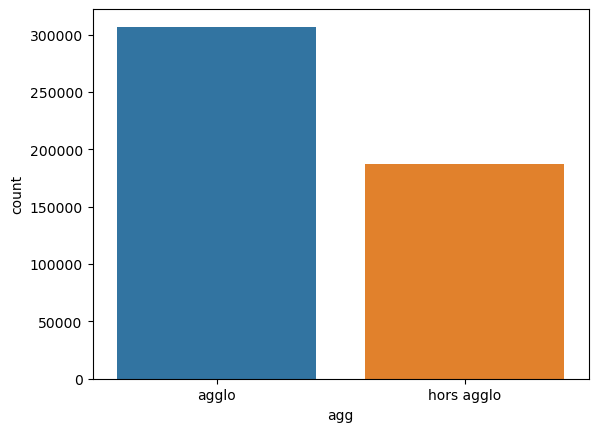

In [23]:
sns.countplot(data=df_merged, x="agg")

<Axes: xlabel='agg', ylabel='proportion'>

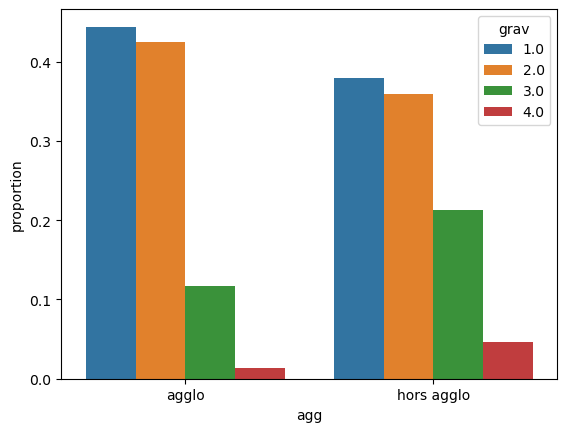

In [24]:
proportions = df_merged.groupby('agg')['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x='agg', y='proportion', hue='grav', data=proportions)

### `place` [-]

On utilisera plutôt la variable `catu`, car finalement les effectifs pour les différentes places sont très faibles.

<Axes: xlabel='place', ylabel='count'>

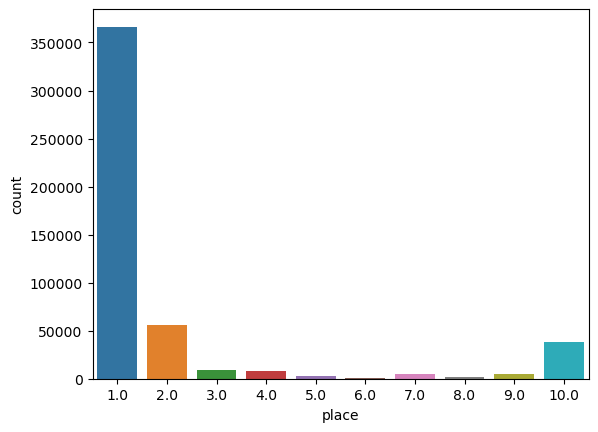

In [25]:
sns.countplot(data=df_merged, x="place")

<Axes: xlabel='place', ylabel='proportion'>

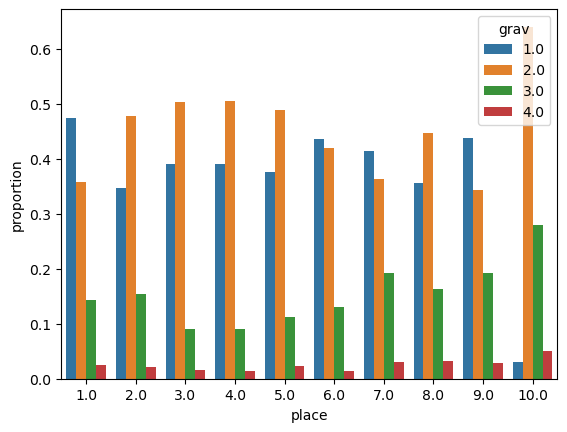

In [26]:
var = "place"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions)

### `catu` [+++]

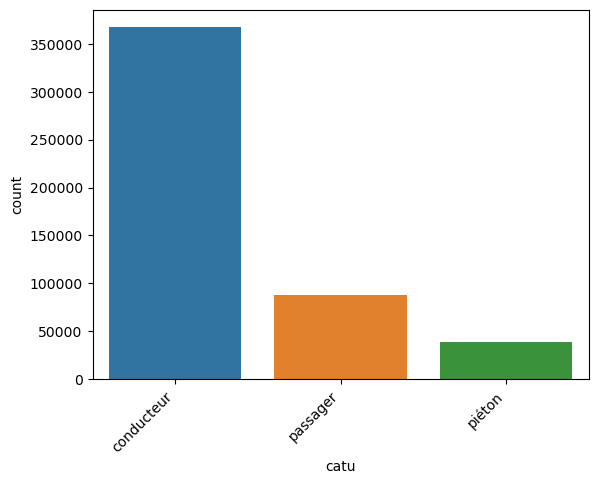

In [27]:
var = "catu"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

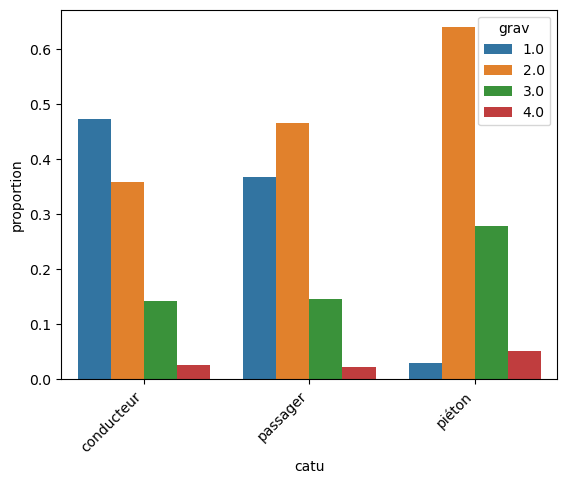

In [28]:
var = "catu"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `sexe` [++]

<Axes: xlabel='sexe', ylabel='count'>

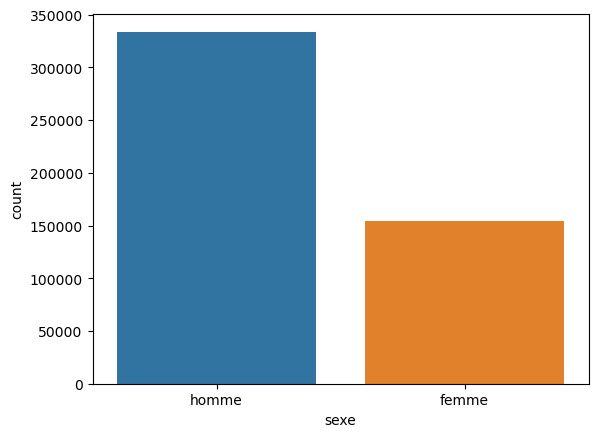

In [29]:
sns.countplot(data=df_merged, x="sexe")

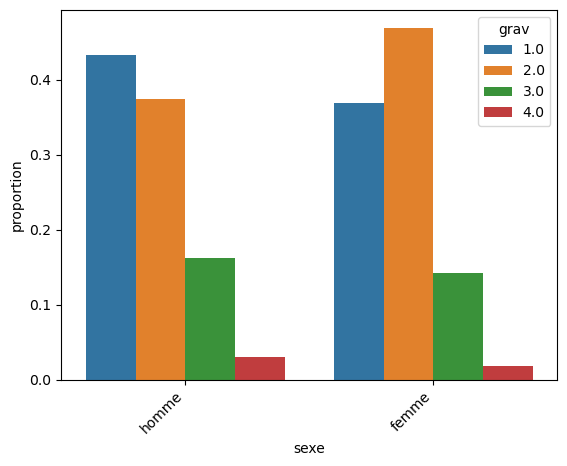

In [30]:
var = "sexe"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `an_nais` [+] (année de naissance)

<Axes: xlabel='an_nais', ylabel='Density'>

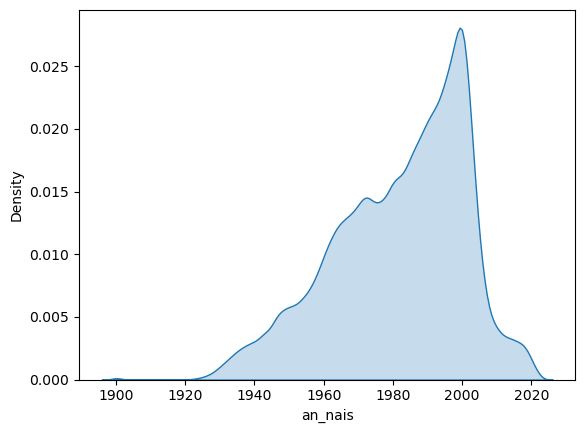

In [31]:
var = "an_nais"
sns.kdeplot(df_merged[var], fill=True)

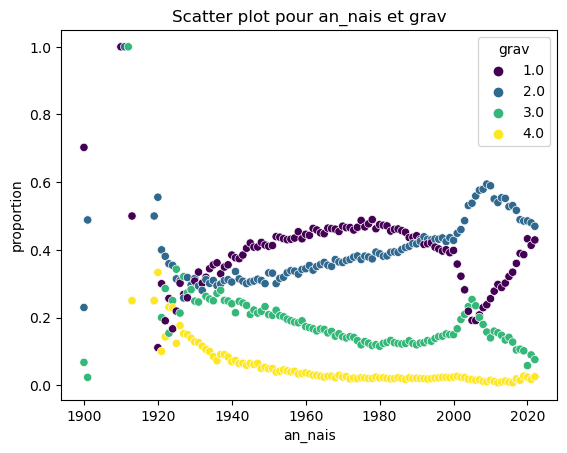

In [32]:
var = "an_nais"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.scatterplot(data=proportions, x=var, y='proportion', hue='grav', palette='viridis')
plt.title('Scatter plot pour an_nais et grav')
plt.show()

In [33]:
df_merged = df_merged[df_merged["an_nais"] >= 1930]

In [34]:
df_merged["ind_avant_1960"] = df_merged["an_nais"] < 1960
df_merged["ind_2002_2012"] = (df_merged["an_nais"] >= 2002) & (df_merged["an_nais"] <= 2012)

### `heure` [+, 2]

In [35]:
df_merged["heure"].value_counts()

18:00:00    6739
17:00:00    5895
17:30:00    5601
18:30:00    5537
19:00:00    5202
            ... 
04:41:00       3
04:24:00       3
03:36:00       3
03:59:00       2
03:31:00       2
Name: heure, Length: 1438, dtype: int64

In [36]:
df_merged["hrmn"]

0         16:15
1         16:15
2         08:34
3         08:34
4         17:15
          ...  
494177    07:50
494178    02:41
494179    15:20
494180    20:50
494181    20:50
Name: hrmn, Length: 486837, dtype: object

In [37]:
df_merged["heure"].apply(lambda x: x.hour)

0         16
1         16
2          8
3          8
4         17
          ..
494177     7
494178     2
494179    15
494180    20
494181    20
Name: heure, Length: 486837, dtype: int64

<Axes: xlabel='h', ylabel='Density'>

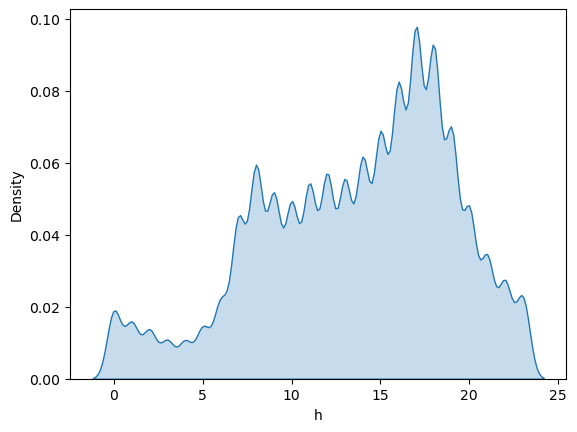

In [38]:
# df_merged["sec"] = df_merged["heure"].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
df_merged["h"] = df_merged["heure"]. apply(lambda x: x.hour)

sns.kdeplot(df_merged["h"], fill=True)

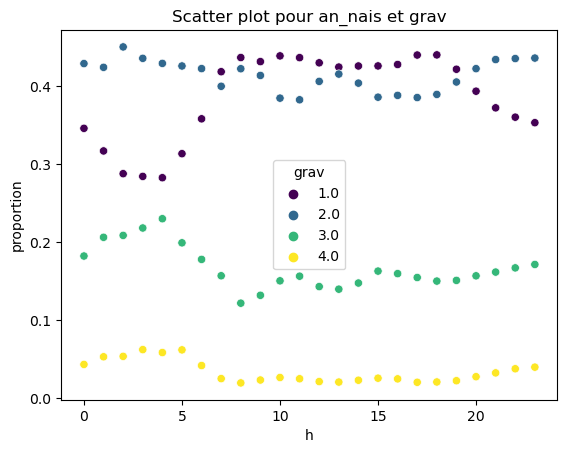

In [39]:
var = "h"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.scatterplot(data=proportions, x=var, y='proportion', hue='grav', palette='viridis')
plt.title('Scatter plot pour an_nais et grav')
plt.show()

In [40]:
df_merged["heure_2"] = np.where(df_merged["h"] < 7, 0,
                                np.where(df_merged["h"] >= 20, 1, 2))

### `nbv` [+, 2]

<Axes: xlabel='nbv', ylabel='count'>

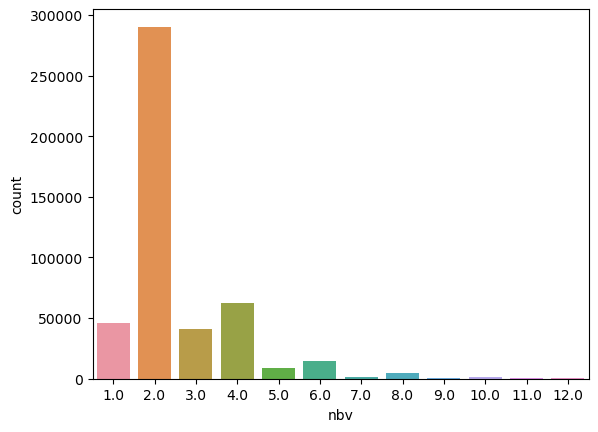

In [41]:
sns.countplot(data=df_merged, x="nbv")

<Axes: xlabel='nbv', ylabel='proportion'>

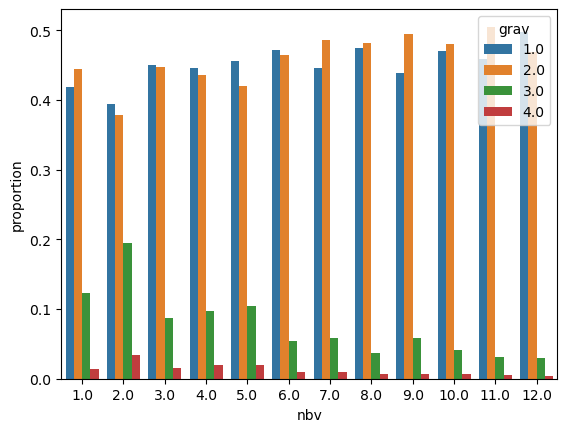

In [42]:
var = "nbv"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions)

In [43]:
df_merged["nbv_2"] = np.where(df_merged["nbv"].isin([2]), 0,
                              np.where(df_merged["nbv"].isin([1, 3, 4, 5]), 1, 2))

### `trajet` [+]

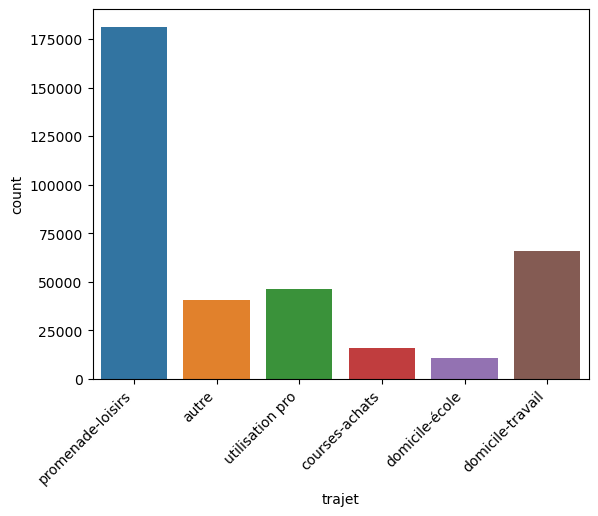

In [44]:
sns.countplot(data=df_merged, x="trajet")
plt.xticks(rotation=45, ha='right')
plt.show()

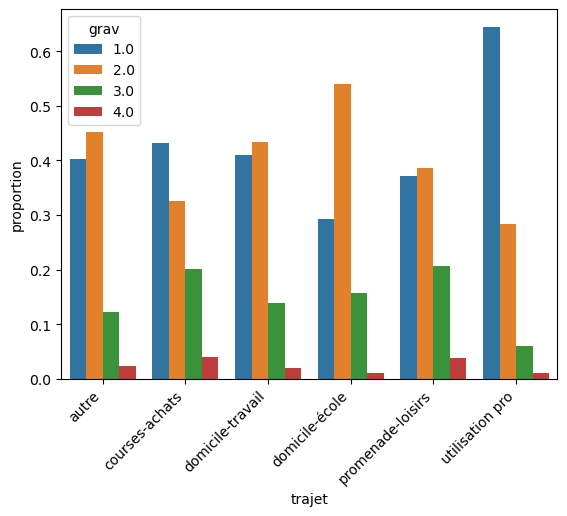

In [45]:
var = "trajet"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions)
plt.xticks(rotation=45, ha='right')
plt.show()

### `lum` [+, 2]

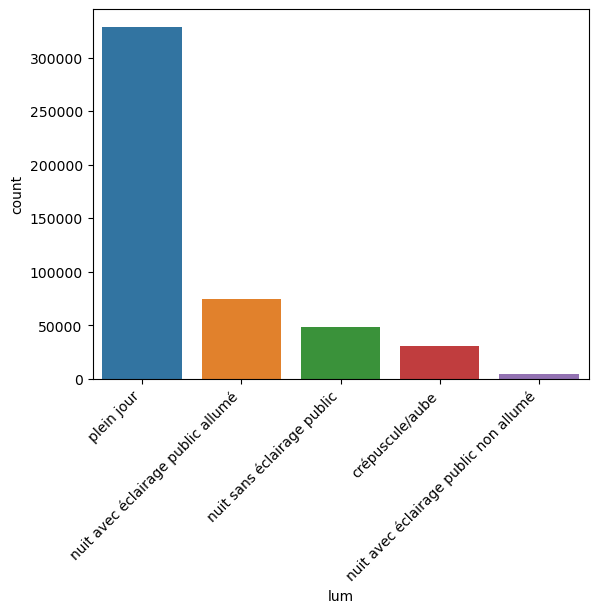

In [46]:
var = "lum"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

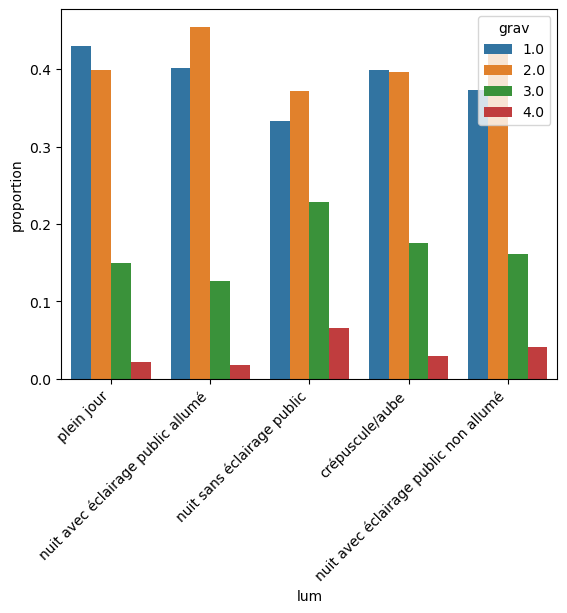

In [47]:
var = "lum"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
df_merged["lum_2"] = np.where(df_merged["lum"].isin(["plein jour", "nuit avec éclairage public allumé"]), 1, 0)

### `surf` [-] (surface)

Il n'y a que 2 modalités aux effectifs importants, et leur profil de gravité est très similaire...

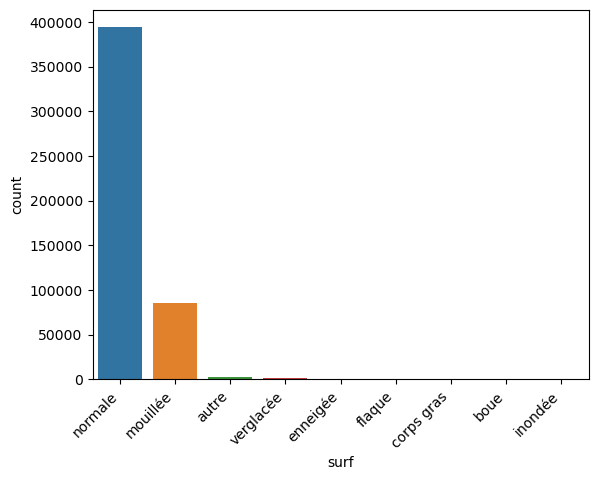

In [49]:
var = "surf"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

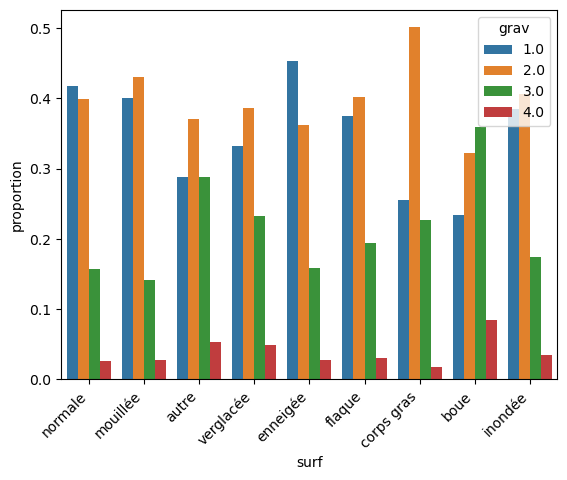

In [50]:
var = "surf"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `atm` [-] (conditions atmosphériques)

Les modalités dont les effectifs sont significatifs ont des profils de gravité trop similaires.

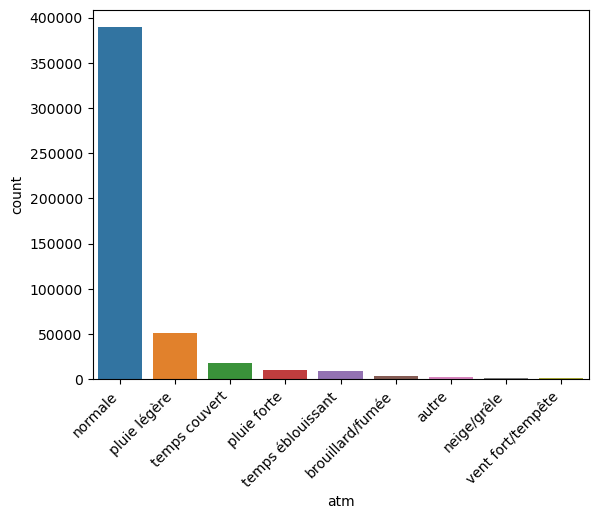

In [51]:
var = "atm"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

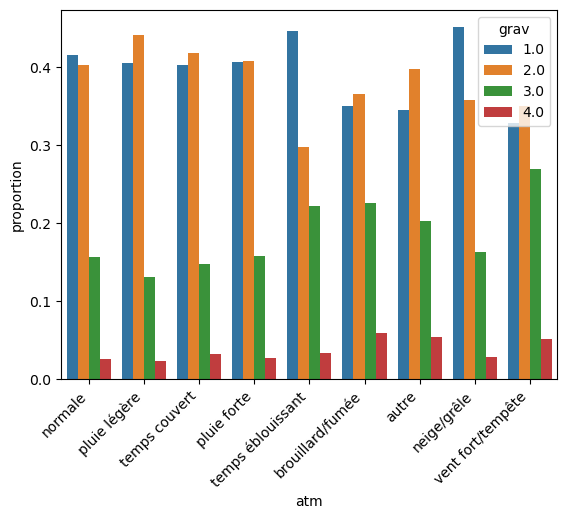

In [52]:
var = "atm"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `int` [-] (intersection)

Les modalités dont les effectifs sont significatifs ont des profils de gravité trop similaires.

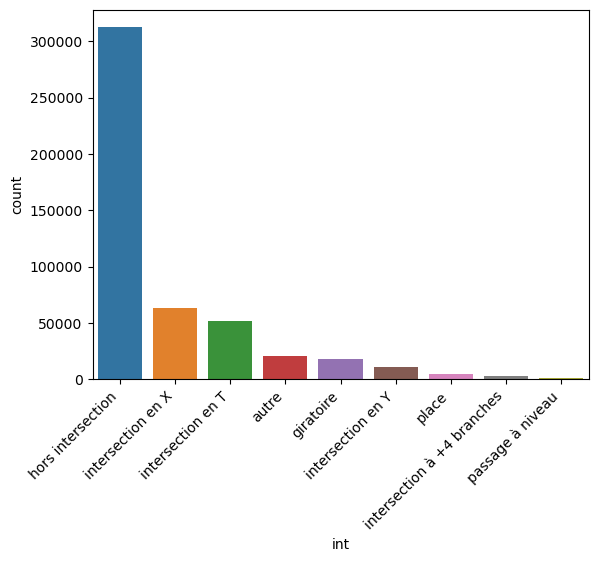

In [53]:
var = "int"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

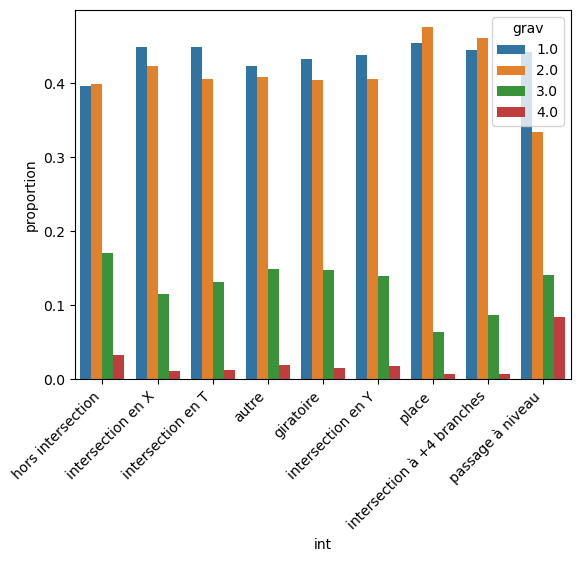

In [54]:
var = "int"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `col` [+, 2] (collision)

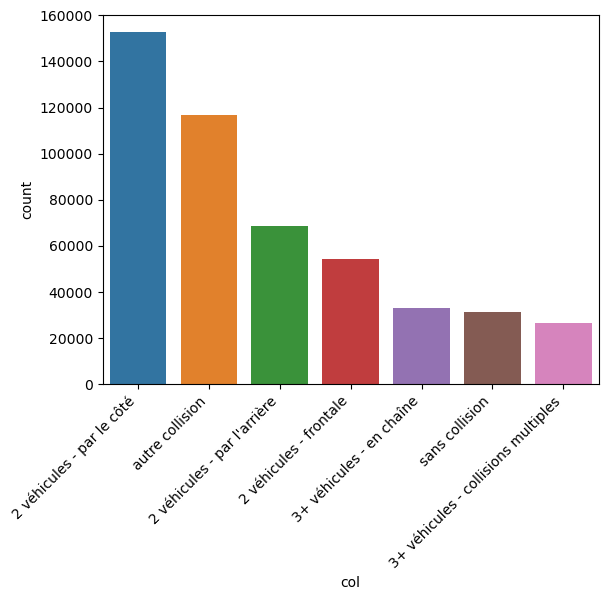

In [55]:
var = "col"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

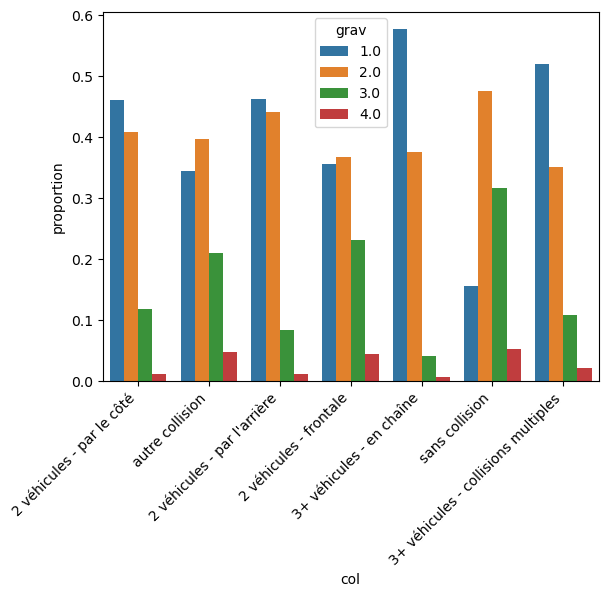

In [56]:
var = "col"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
df_merged["col_2"] = np.where(df_merged["col"].isin(["autre collision", "2 véhicules - frontale", "sans collision"]), 1, 0)

### `catr` [+, 2] (catégorie route)

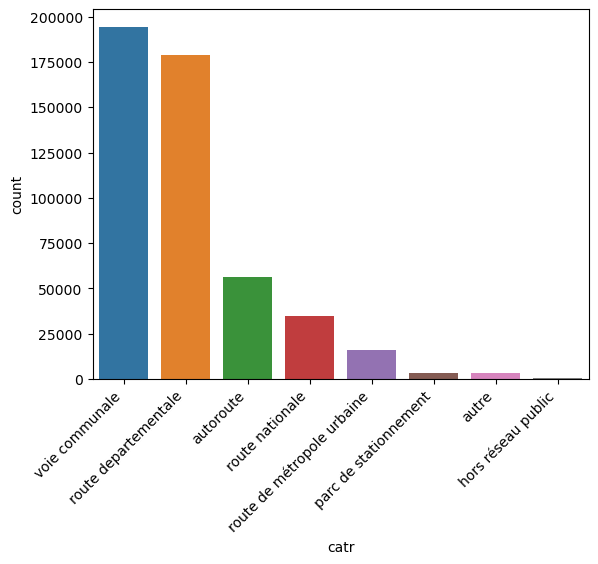

In [58]:
var = "catr"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

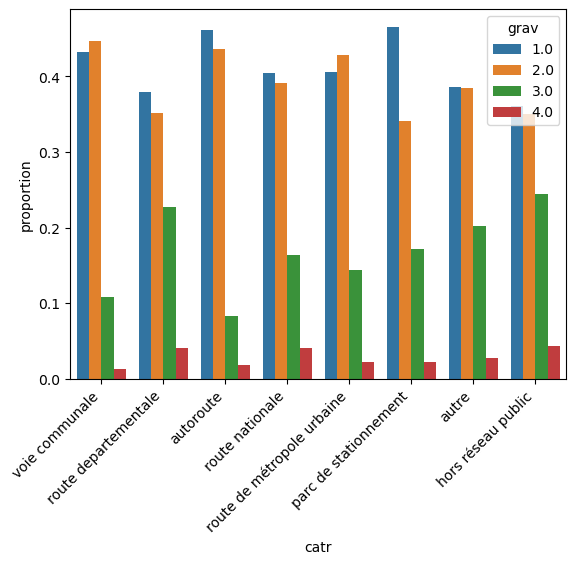

In [59]:
var = "catr"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
df_merged["catr_2"] = np.where(df_merged["catr"].isin(["route départementale", "hors réseau public"]), 0,
                               np.where(df_merged["catr"].isin(["route nationale", "route de métropole urbaine",
                                                               "parc de stationnement", "autre"]), 1, 2))

### `circ` [++] (régime de circulation)

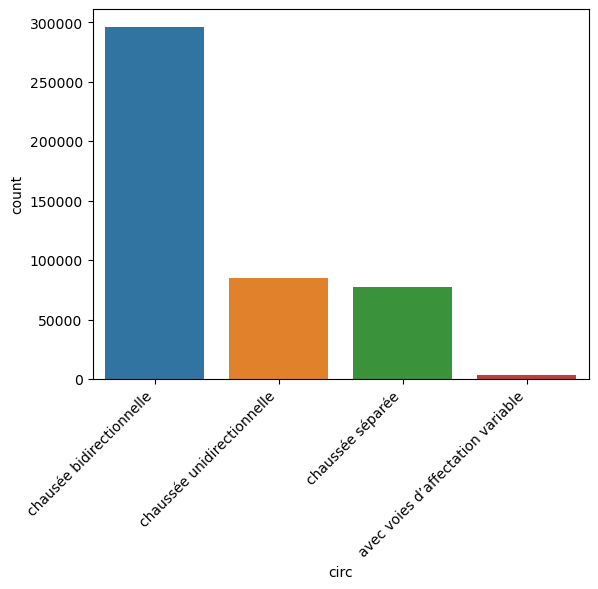

In [61]:
var = "circ"
sns.countplot(data=df_merged, x=var, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

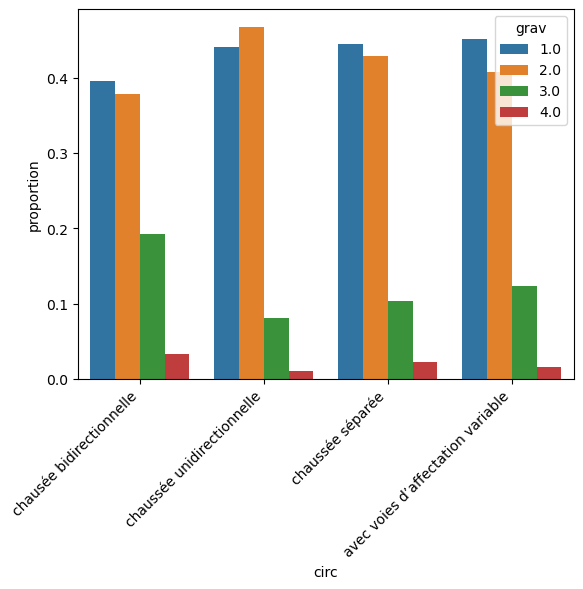

In [62]:
var = "circ"
proportions = df_merged.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_merged[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `vosp` [-] (voie réservée)

Trop de `NaN` et profils de gravités trop similaires.

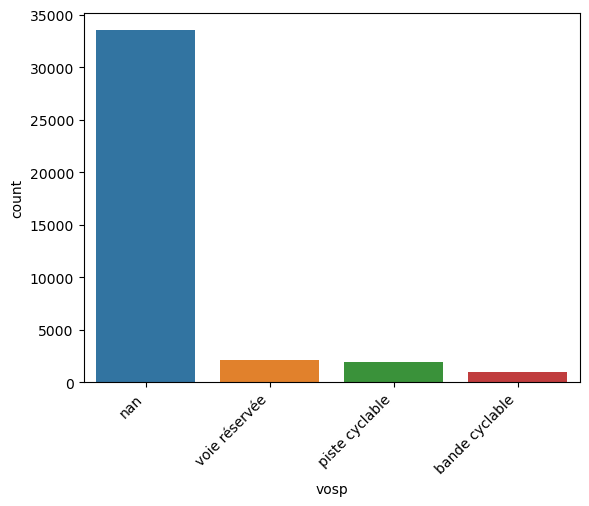

In [63]:
var = "vosp"
df_fill_na = df_pieton.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

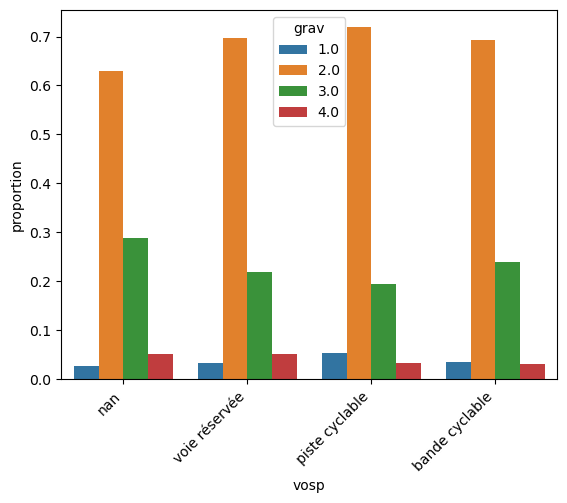

In [64]:
var = "vosp"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `prof` [-] (déclivité de la route)

Les modalités ont des profils de gravité trop similaires.

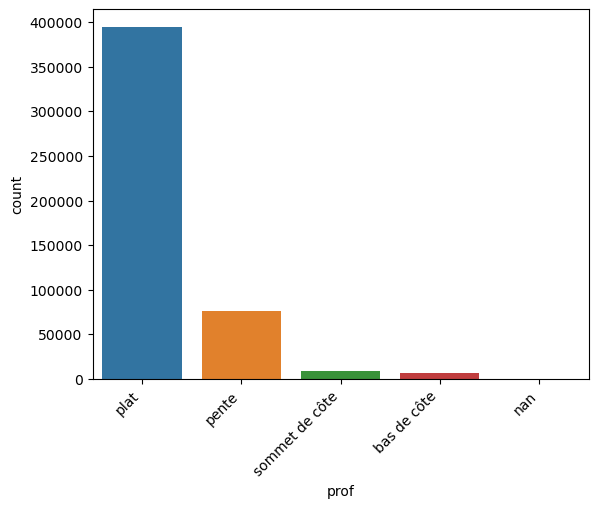

plat              394513
pente              76698
sommet de côte      8462
bas de côte         7086
nan                   78
Name: prof, dtype: int64

In [65]:
var = "prof"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

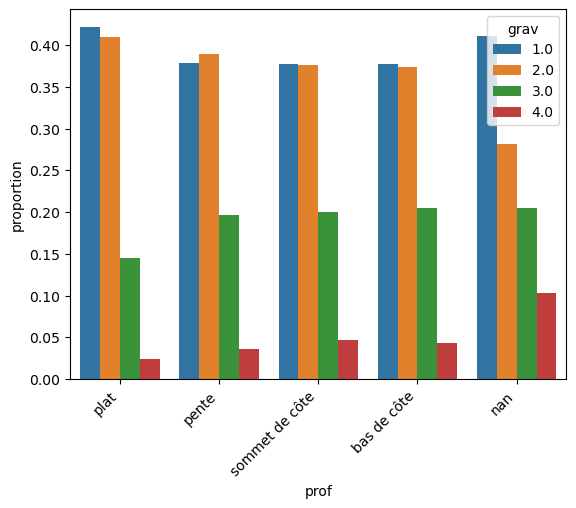

In [66]:
var = "prof"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `plan` [+, 2] (tracé en plan)

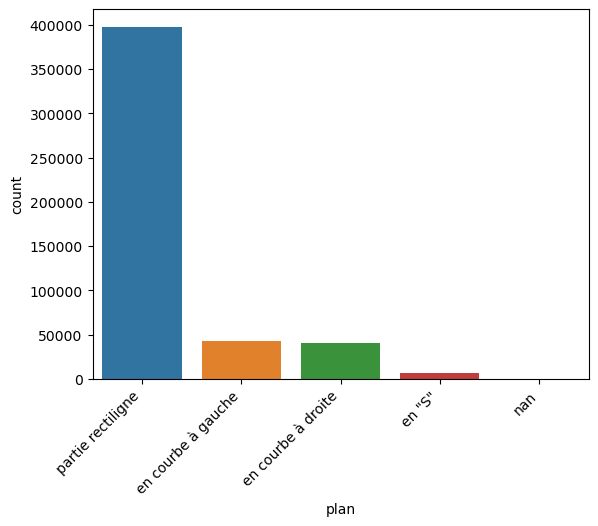

partie rectiligne     397908
en courbe à gauche     42301
en courbe à droite     40459
en "S"                  6109
nan                       60
Name: plan, dtype: int64

In [67]:
var = "plan"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

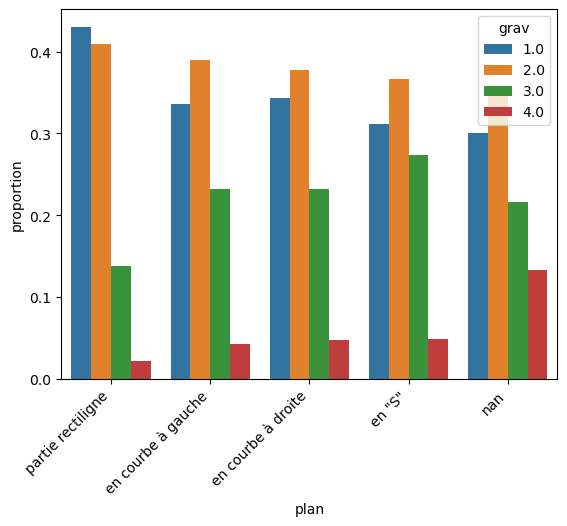

In [68]:
var = "plan"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [69]:
df_merged["plan_2"] = np.where(df_merged["plan"].isin(["partie rectiligne"]), 1, 0)

### `infra` [-] (aménagement, infrastructure)

Il y a _a priori_ trop peu de non `NaN` pour en tirer quelque chose d'intéressant, et de toute façon les profils de gravité sont assez similaires.

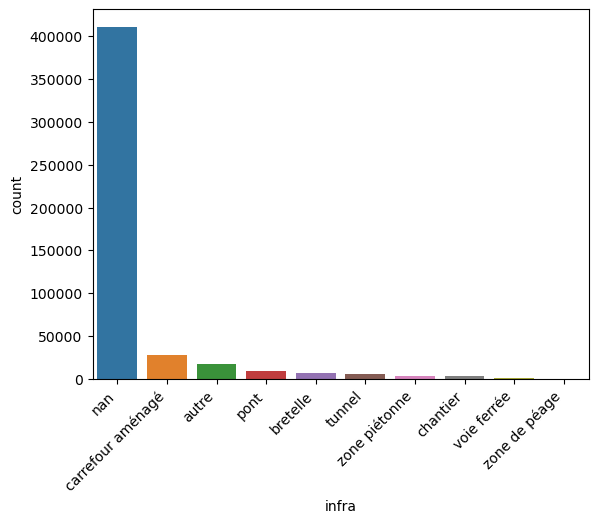

nan                  410499
carrefour aménagé     27761
autre                 16992
pont                   8845
bretelle               6748
tunnel                 6393
zone piétonne          3962
chantier               3739
voie ferrée            1531
zone de péage           367
Name: infra, dtype: int64

In [70]:
var = "infra"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

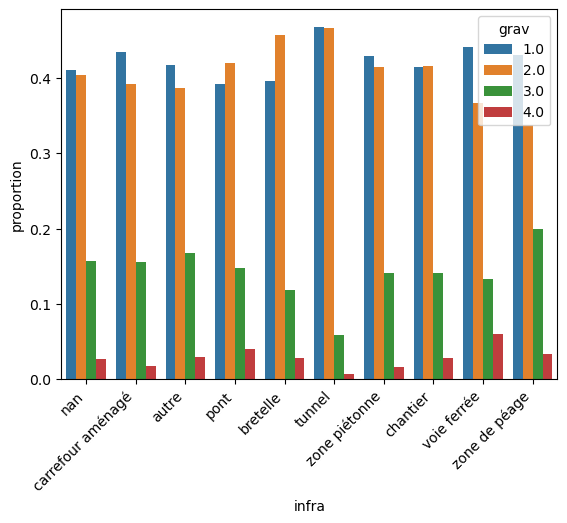

In [71]:
var = "infra"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `situ` [+, 2]

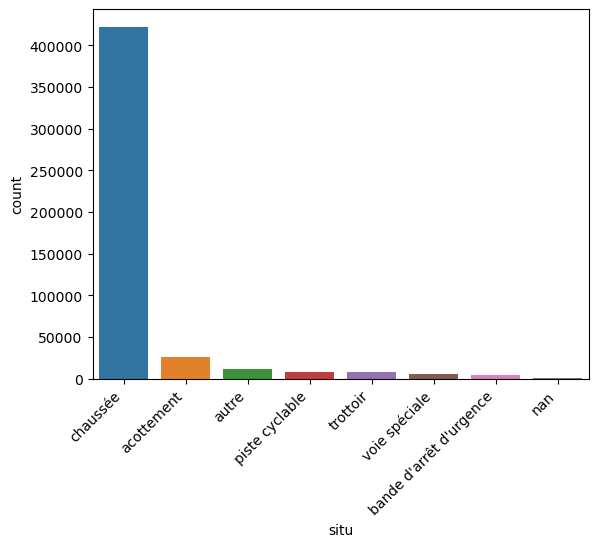

chaussée                   422258
acottement                  26228
autre                       12089
piste cyclable               8582
trottoir                     7585
voie spéciale                5542
bande d'arrêt d'urgence      4280
nan                           273
Name: situ, dtype: int64

In [72]:
var = "situ"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

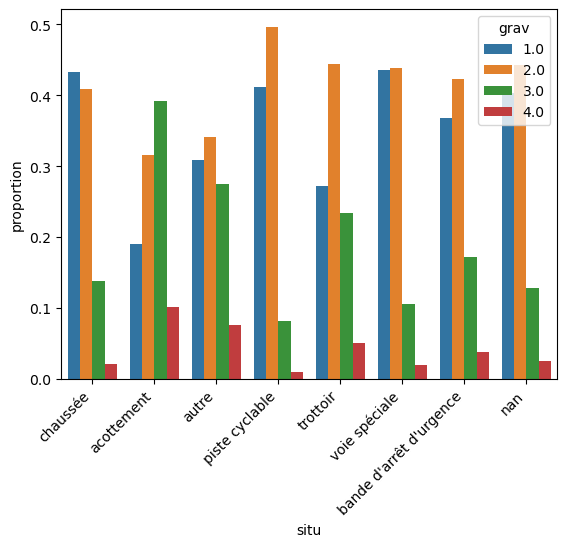

In [73]:
var = "situ"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [74]:
df_merged["situ_2"] = np.where(df_merged["situ"].isin(["acottement"]), 0, 
                               np.where(df_merged["situ"].isin(["autre", "trottoir"]), 1, 2))

### `obs` [-] (obstacle fixe heurté)

Pas très intéressant, quasi que des "sans objet" puisque ce sont essentiellement des obstacles mobiles.

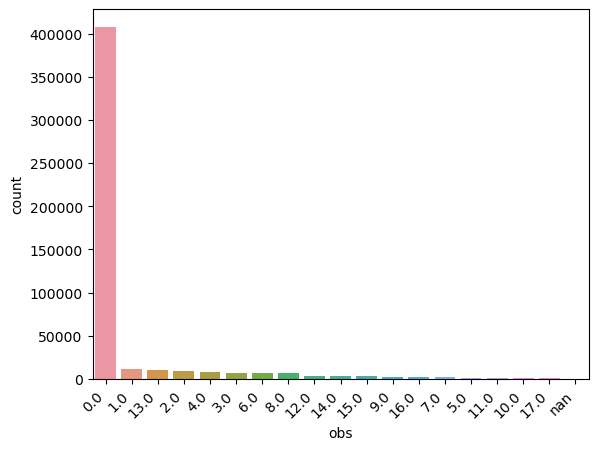

0.0     408029
1.0      11516
13.0     10077
2.0       8767
4.0       7491
3.0       7403
6.0       6573
8.0       6491
12.0      3809
14.0      3622
15.0      3301
9.0       2577
16.0      2223
7.0       1663
5.0        955
11.0       921
10.0       639
17.0       627
nan        153
Name: obs, dtype: int64

In [75]:
var = "obs"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

### `obsm` [+, 2] (type d'obstacle heurté)

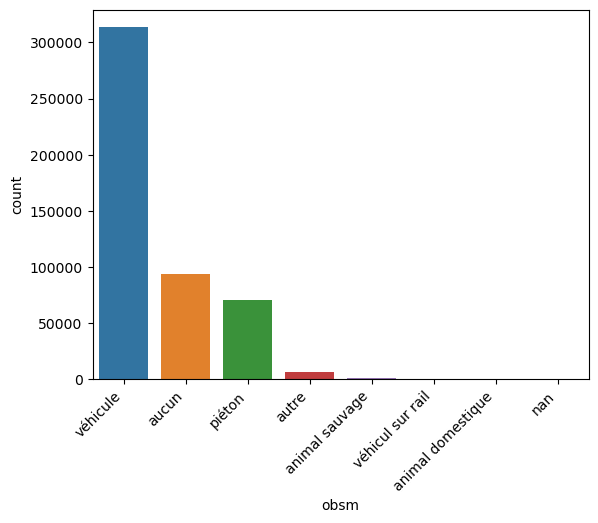

véhicule             313447
aucun                 94173
piéton                70617
autre                  6249
animal sauvage         1278
véhicul sur rail        473
animal domestique       377
nan                     223
Name: obsm, dtype: int64

In [76]:
var = "obsm"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

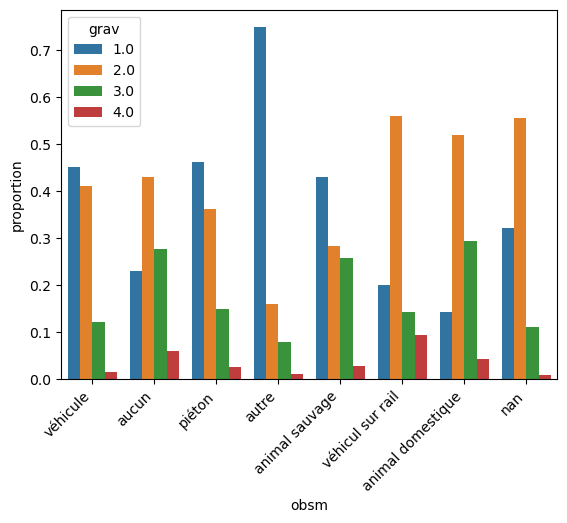

In [77]:
var = "obsm"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [78]:
df_merged["obsm_2"] = np.where(df_merged["obsm"].isin(["aucun"]), 0, 
                               np.where(df_merged["obsm"].isin(["autre"]), 1, 2))

### `choc` [+, 2 à venir]

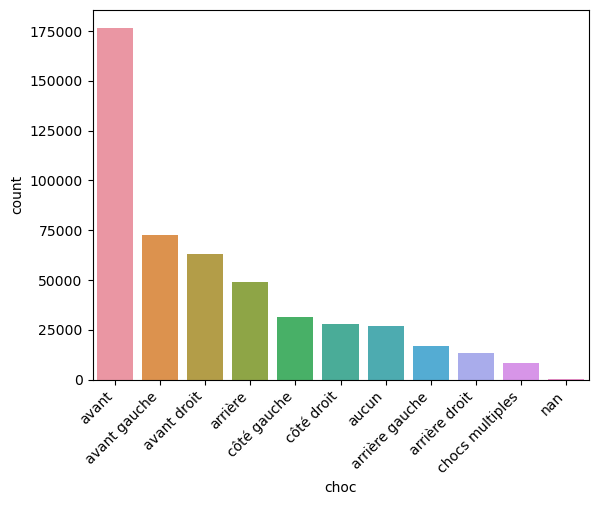

avant              176763
avant gauche        72826
avant droit         63136
arrière             48960
côté gauche         31623
côté droit          27892
aucun               26847
arrière gauche      16935
arrière droit       13517
chocs multiples      8146
nan                   192
Name: choc, dtype: int64

In [79]:
var = "choc"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

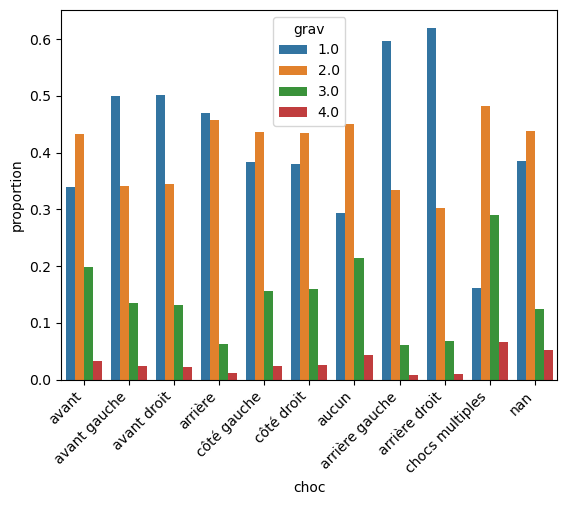

In [80]:
var = "choc"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `manv` [+, réfléchir]

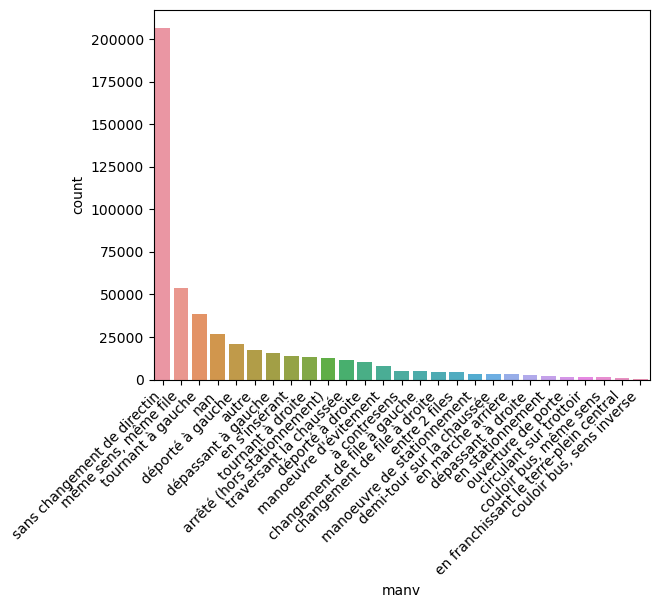

sans changement de directin               206884
même sens, même file                       53753
tournant à gauche                          38275
nan                                        26981
déporté à gauche                           21001
autre                                      17200
dépassant à gauche                         15712
en s'insérant                              13909
tournant à droite                          13104
arrêté (hors stationnement)                12429
traversant la chaussée                     11706
déporté à droite                           10551
manoeuvre d'évitement                       7859
à contresens                                4981
changement de file à gauche                 4971
changement de file à droite                 4414
entre 2 files                               4384
manoeuvre de stationnement                  3165
demi-tour sur la chaussée                   3063
en marche arrière                           3024
dépassant à droite  

In [81]:
var = "manv"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

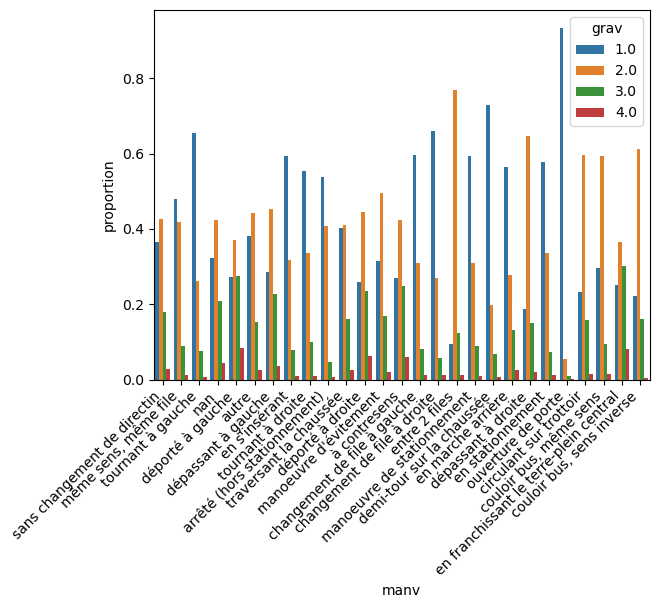

In [82]:
var = "manv"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `motor` [+, réfléchir] (motorisation du véhicule)

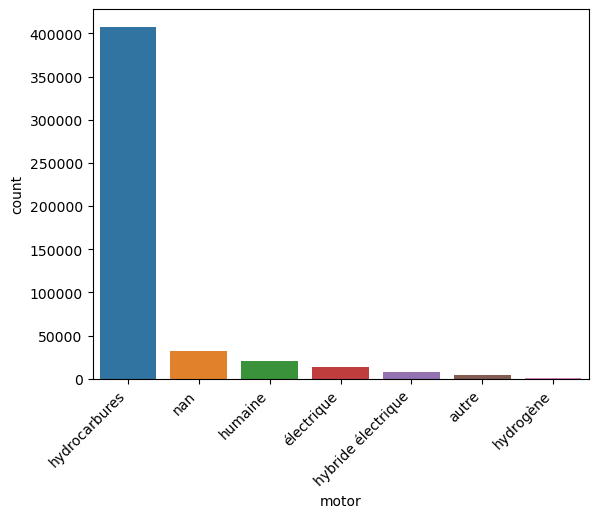

hydrocarbures         407859
nan                    32626
humaine                20717
électrique             13147
hybride électrique      7886
autre                   4304
hydrogène                298
Name: motor, dtype: int64

In [83]:
var = "motor"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

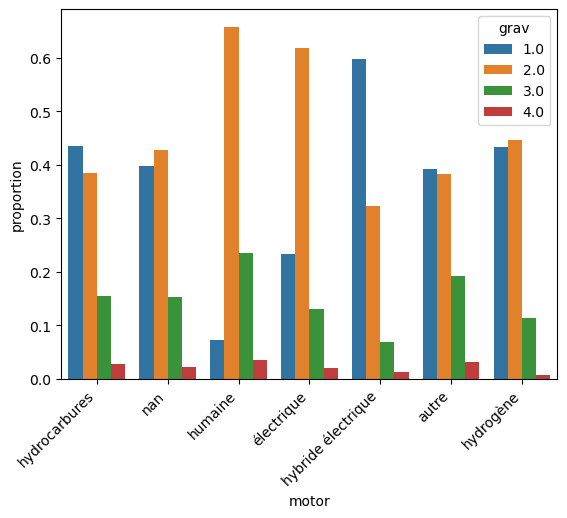

In [84]:
var = "motor"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `locp` [-] (localisation du piéton)

Les modalités dont les effectifs sont significatifs ont des profils de gravité trop similaires.

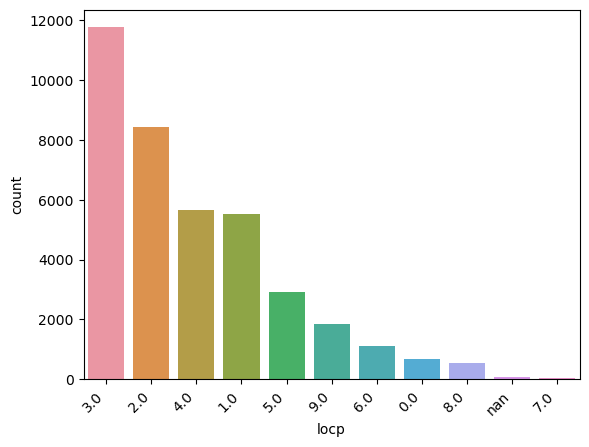

3.0    11762
2.0     8424
4.0     5671
1.0     5509
5.0     2924
9.0     1837
6.0     1108
0.0      688
8.0      544
nan       82
7.0       42
Name: locp, dtype: int64

In [85]:
var = "locp"
df_fill_na = df_pieton.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

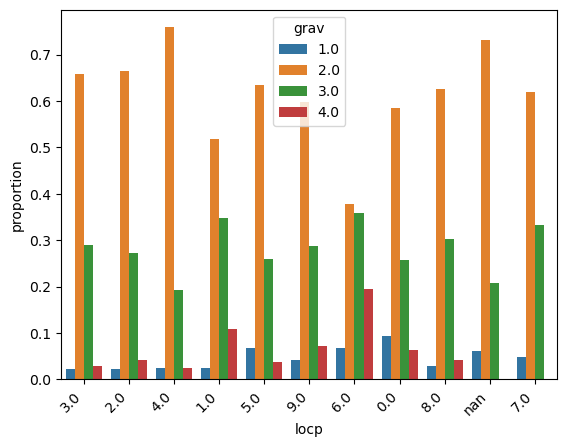

In [86]:
var = "locp"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `actp` [-] (action du piéton)

La variable est trop peu variée pour être intéressante à exploiter.

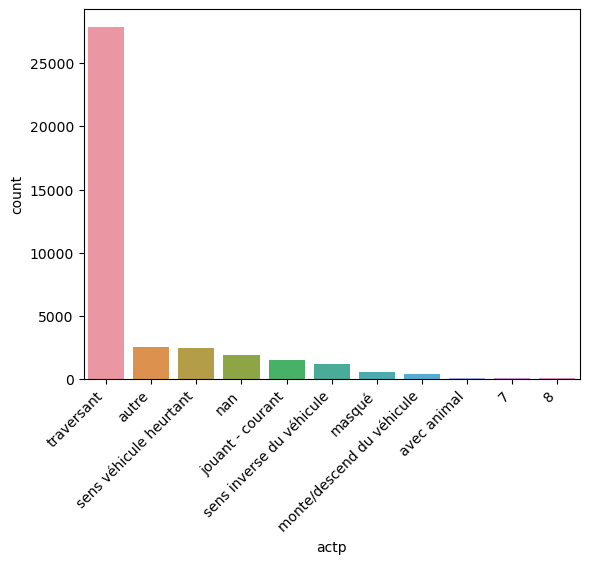

traversant                   27870
autre                         2523
sens véhicule heurtant        2440
nan                           1903
jouant - courant              1531
sens inverse du véhicule      1156
masqué                         529
monte/descend du véhicule      421
avec animal                    106
7                               60
8                               52
Name: actp, dtype: int64

In [87]:
var = "actp"
df_fill_na = df_pieton.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

### `etatp` [-]

Profils de gravité trop similaires.

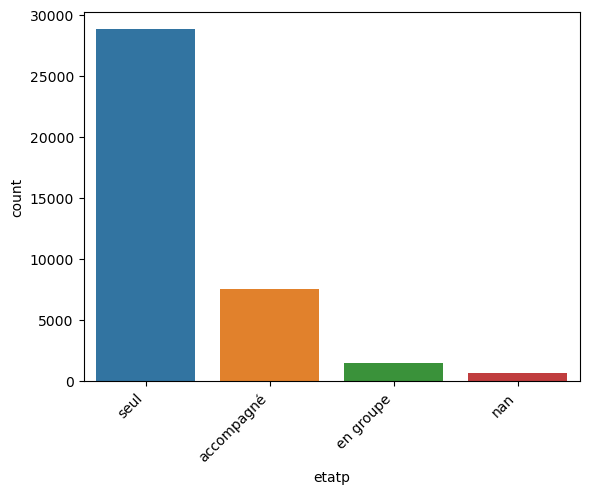

seul          28815
accompagné     7558
en groupe      1509
nan             709
Name: etatp, dtype: int64

In [88]:
var = "etatp"
df_fill_na = df_pieton.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

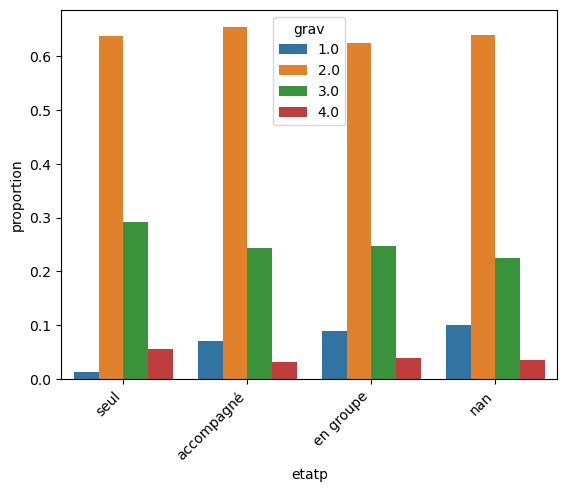

In [89]:
var = "etatp"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `jour` [-]

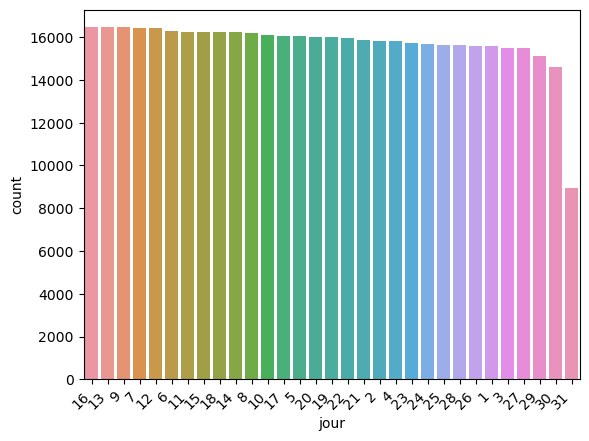

16    16462
13    16456
9     16452
7     16431
12    16415
6     16298
11    16261
15    16237
18    16235
14    16221
8     16175
10    16092
17    16045
5     16036
20    16028
19    16011
22    15963
21    15881
2     15842
4     15812
23    15730
24    15679
25    15631
28    15630
26    15581
1     15572
3     15509
27    15505
29    15107
30    14608
31     8932
Name: jour, dtype: int64

In [90]:
var = "jour"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

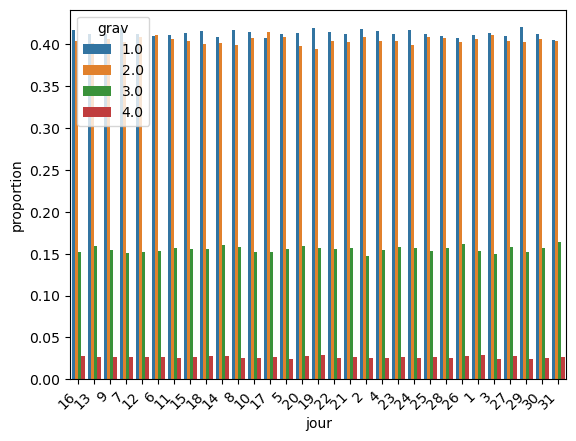

In [91]:
var = "jour"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `mois` [-]

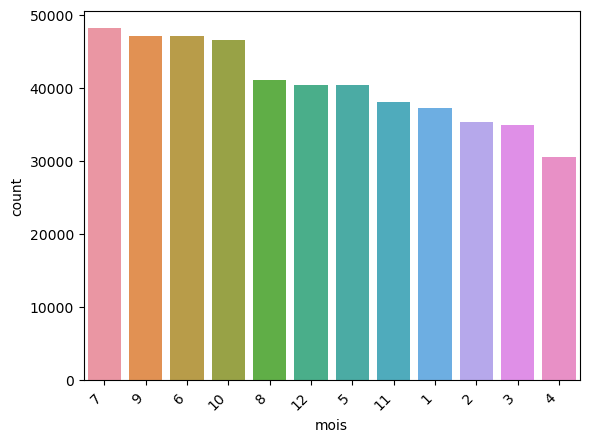

7     48159
9     47089
6     47059
10    46591
8     41071
12    40432
5     40338
11    38041
1     37211
2     35304
3     34986
4     30556
Name: mois, dtype: int64

In [92]:
var = "mois"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

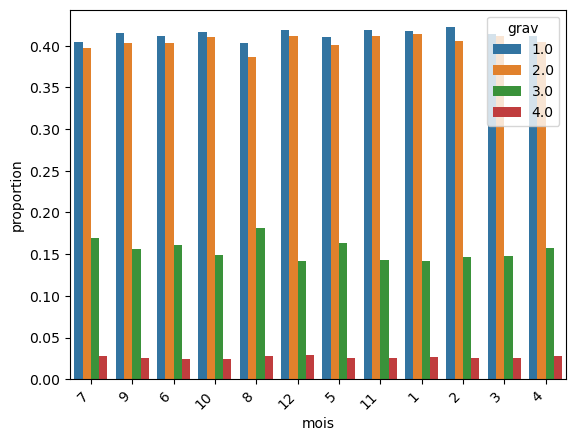

In [93]:
var = "mois"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

### `catv`[+]

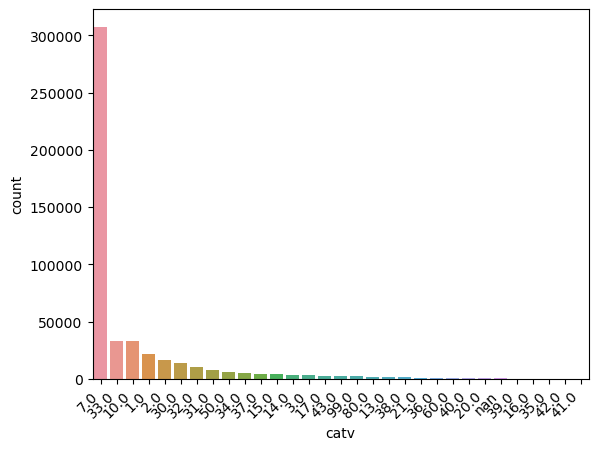

7.0     307402
33.0     33111
10.0     33065
1.0      21974
2.0      16131
30.0     13936
32.0     10116
31.0      7439
50.0      5726
34.0      4899
37.0      4499
15.0      3898
14.0      3308
3.0       3131
17.0      2837
43.0      2374
99.0      2162
80.0      1935
13.0      1756
38.0      1676
21.0      1062
36.0       890
60.0       797
40.0       760
20.0       682
nan        666
39.0       204
16.0       138
35.0       110
42.0        95
41.0        58
Name: catv, dtype: int64

In [94]:
var = "catv"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

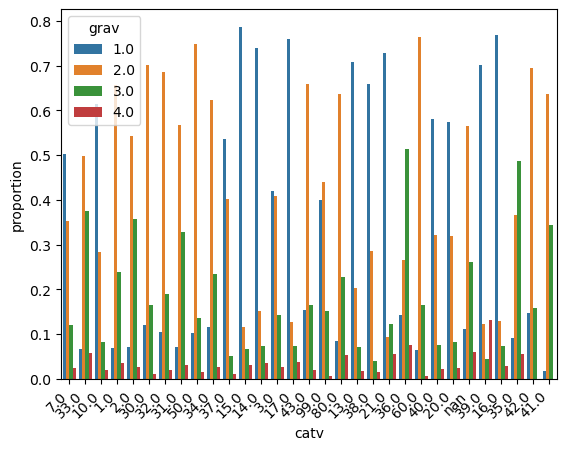

In [95]:
var = "catv"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

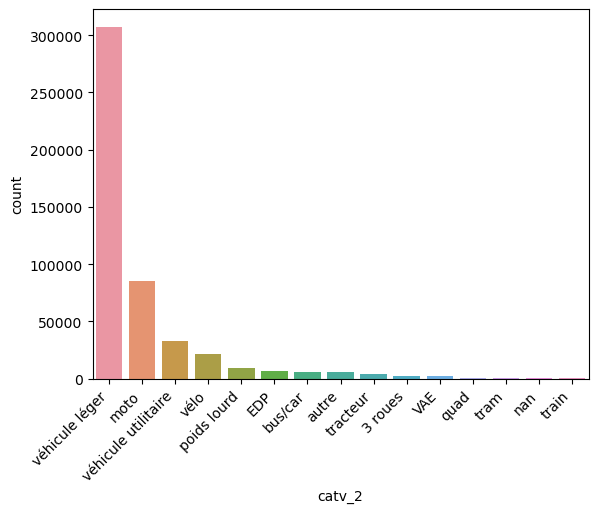

véhicule léger         307402
moto                    85632
véhicule utilitaire     33065
vélo                    21974
poids lourd              8962
EDP                      6523
bus/car                  6175
autre                    5975
tracteur                 4037
3 roues                  2527
VAE                      1935
quad                     1000
tram                      760
nan                       666
train                     204
Name: catv_2, dtype: int64

In [96]:
var = "catv_2"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()
df_fill_na[var].value_counts()

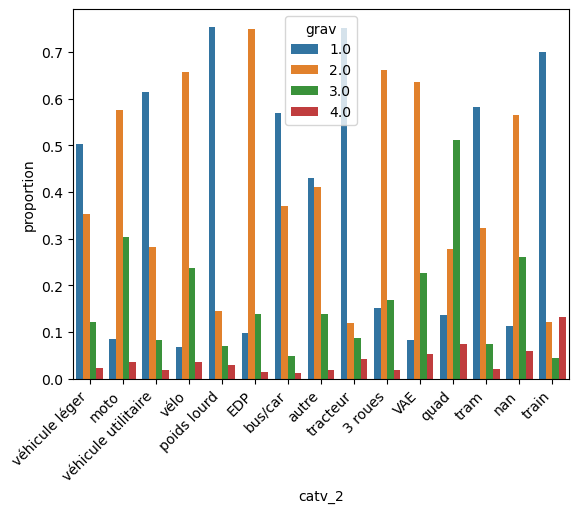

In [97]:
var = "catv_2"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

## Equipements

### `ceinture` [+++]

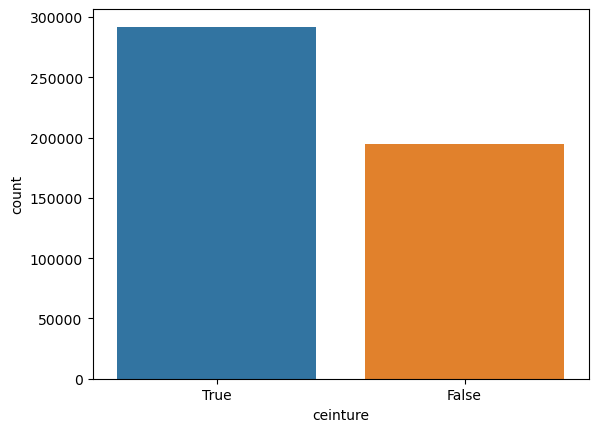

True     291921
False    194916
Name: ceinture, dtype: int64

In [98]:
var = "ceinture"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

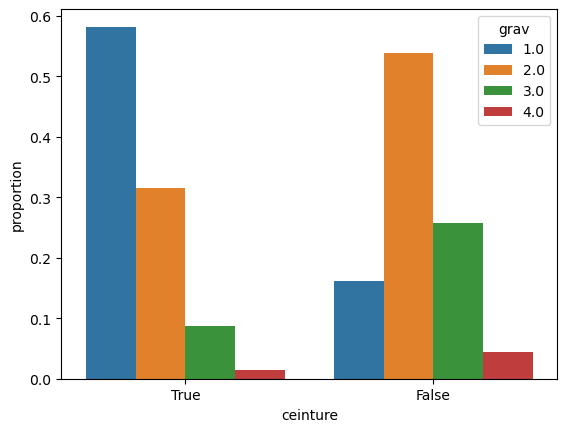

In [99]:
var = "ceinture"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

### `dispositif enfants` [-]

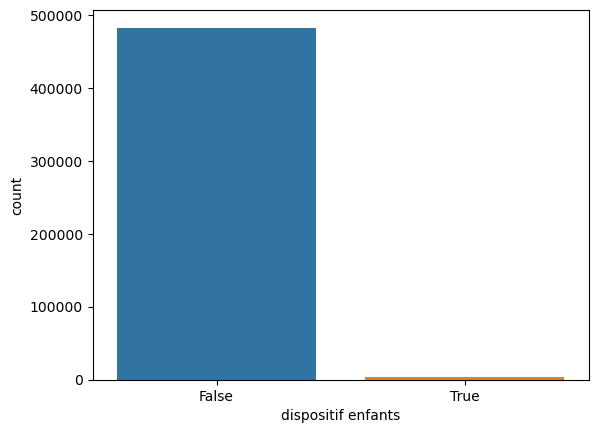

False    483140
True       3697
Name: dispositif enfants, dtype: int64

In [100]:
var = "dispositif enfants"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

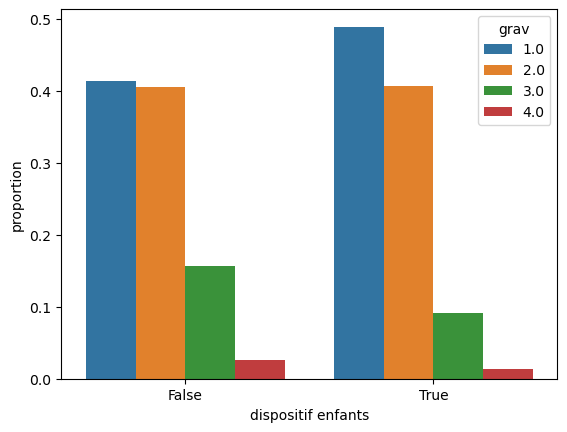

In [101]:
var = "dispositif enfants"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

### `casque` [+++]

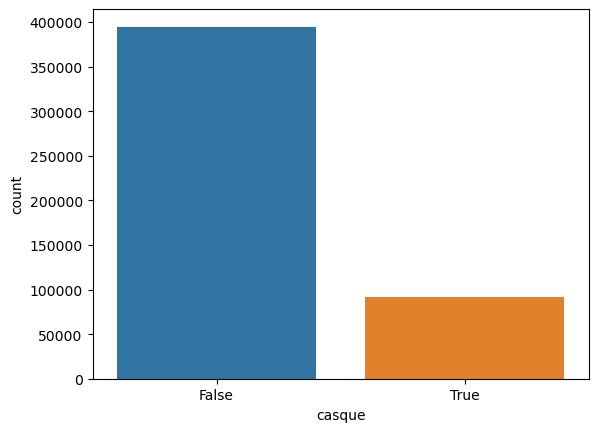

False    394790
True      92047
Name: casque, dtype: int64

In [102]:
var = "casque"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

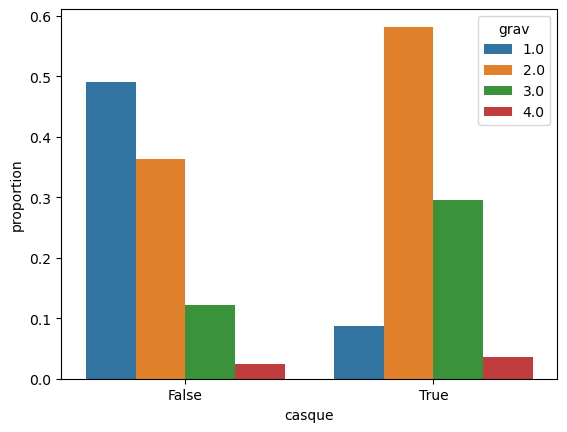

In [103]:
var = "casque"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

### `airbag` [-]

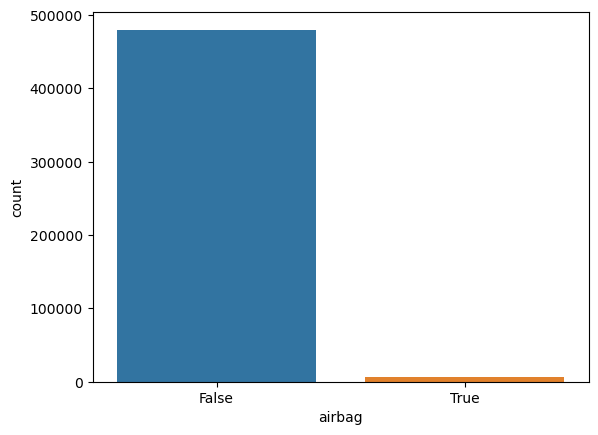

False    480145
True       6692
Name: airbag, dtype: int64

In [104]:
var = "airbag"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

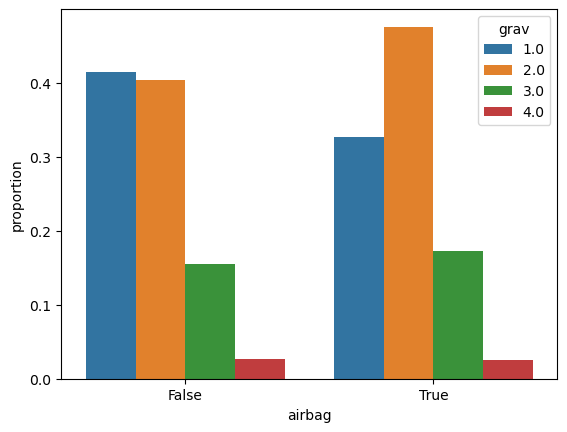

In [105]:
var = "airbag"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

### `gilet réfléchissant`

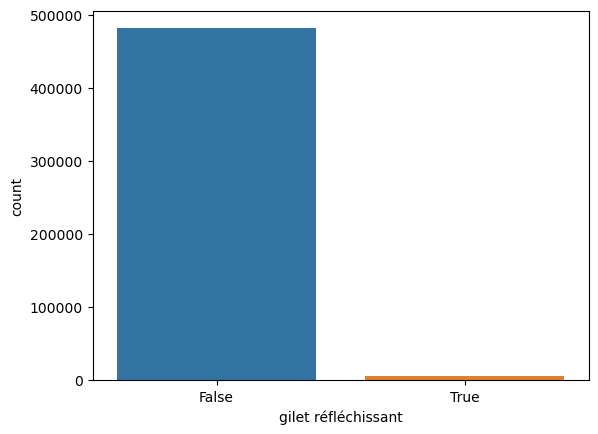

False    481594
True       5243
Name: gilet réfléchissant, dtype: int64

In [106]:
var = "gilet réfléchissant"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

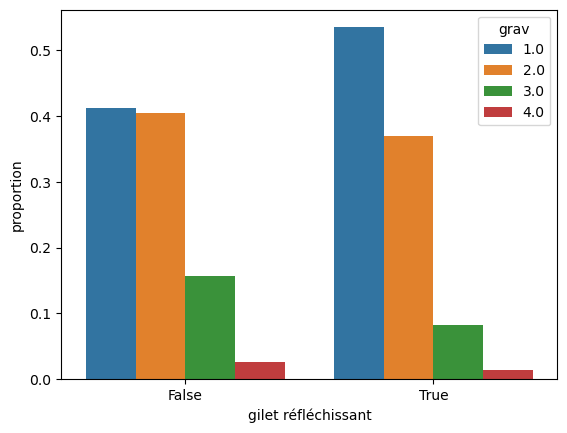

In [107]:
var = "gilet réfléchissant"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

### `gants`

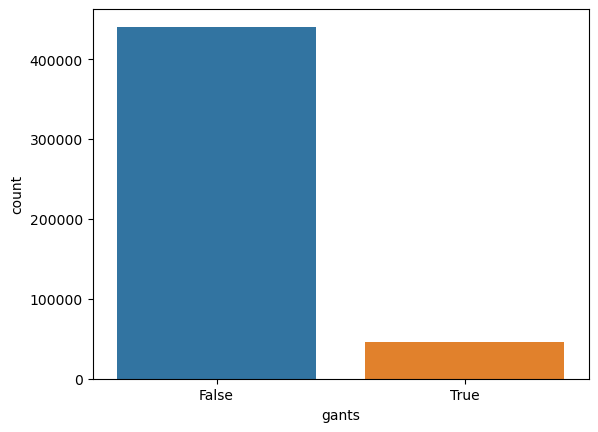

False    440633
True      46204
Name: gants, dtype: int64

In [108]:
var = "gants"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

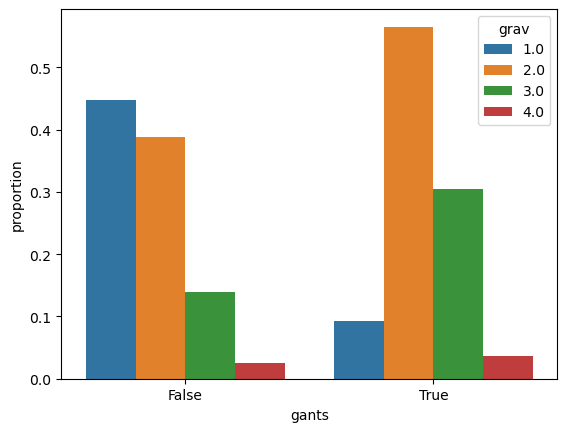

In [109]:
var = "gants"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

### `autre`

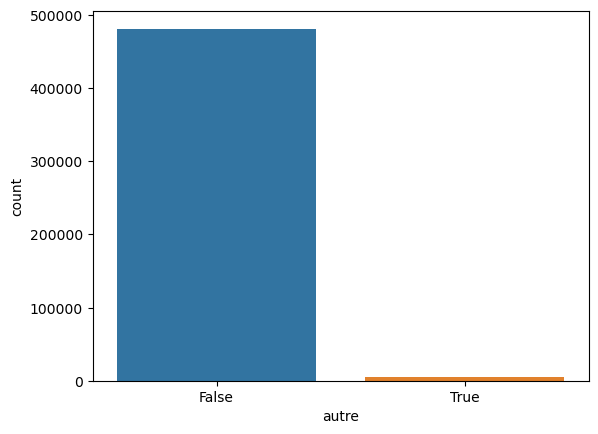

False    481343
True       5494
Name: autre, dtype: int64

In [110]:
var = "autre"
df_fill_na = df_merged.copy()
df_fill_na[var].fillna("nan", inplace=True)
sns.countplot(data=df_fill_na, x=var, order=df_fill_na[var].value_counts().index)
plt.show()
df_fill_na[var].value_counts()

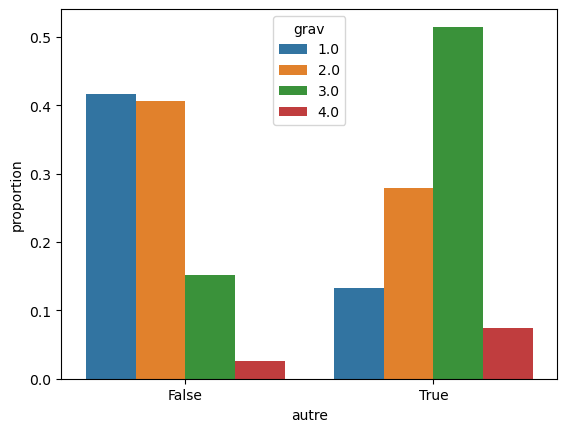

In [111]:
var = "autre"
proportions = df_fill_na.groupby(var)['grav'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x=var, y='proportion', hue='grav', data=proportions, order=df_fill_na[var].value_counts().index)
plt.show()

# Premiers modèles

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

### MCO


In [113]:
# création de variable catégorielle pertinent en vue de la regression 
df_merged["moto"]=np.where(df_merged['catv_2'] == 'moto', 1, 0).astype(int)
df_merged["vélo"]=np.where(df_merged['catv_2'] == 'vélo', 1, 0).astype(int)
df_merged["poids lourd"]=np.where(df_merged['catv_2'] == 'poids lourd', 1, 0).astype(int)
df_merged["poids lourd"]=np.where(df_merged['catv_2'] == 'poids lourd', 1, 0).astype(int)

In [114]:
# au vue des stats descriptives ces variables semble particuliérment déterminantes
numeric_features = ["an_nais", "h", "vma"]
categorical_features = ["agg", "catu", "sexe", "nbv_2", "trajet", "lum_2", "col_2", 
                        "catr_2", "circ", "plan_2", "situ_2", "obsm_2", "ceinture","obsm","casque","gants","moto","vélo","poids lourd"]
df_elem1 = df_merged[["grav"] + numeric_features + categorical_features]
df_elem1.dropna(inplace=True)
df_elem1

C:\Users\User\AppData\Local\Temp\ipykernel_6676\3799497289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elem1.dropna(inplace=True)


,grav,an_nais,h,vma,agg,catu,sexe,nbv_2,trajet,lum_2,...,plan_2,situ_2,obsm_2,ceinture,obsm,casque,gants,moto,vélo,poids lourd
0,3.0,2008.0,16,50.0,agglo,conducteur,homme,0,promenade-loisirs,1,...,1,2,2,False,véhicule,True,False,1,0,0
1,1.0,1948.0,16,50.0,agglo,conducteur,homme,0,promenade-loisirs,1,...,1,2,2,True,véhicule,False,False,0,0,0
2,2.0,1988.0,8,50.0,agglo,conducteur,homme,0,autre,1,...,1,2,2,True,véhicule,False,False,0,0,0
3,1.0,1970.0,8,50.0,agglo,conducteur,homme,0,utilisation pro,1,...,1,2,2,True,véhicule,False,False,0,0,0
7,2.0,1967.0,18,30.0,agglo,piéton,femme,1,promenade-loisirs,1,...,1,2,2,False,piéton,False,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494174,2.0,1968.0,9,130.0,hors agglo,passager,homme,1,promenade-loisirs,1,...,1,2,2,True,véhicule,False,False,0,0,0
494175,1.0,1972.0,7,90.0,hors agglo,conducteur,femme,0,domicile-travail,1,...,1,2,2,True,véhicule,False,False,0,0,0
494176,2.0,1964.0,7,90.0,hors agglo,conducteur,homme,0,domicile-travail,1,...,1,2,2,True,véhicule,False,False,0,0,0
494177,2.0,1988.0,7,90.0,hors agglo,conducteur,femme,0,domicile-travail,1,...,1,2,2,True,véhicule,False,False,0,0,0


Encodage pour  la régression linéaire. création de variables binaires et conversion de format non prix par stat models en int 

In [115]:
# Binarisation 
df_elem1_bin=pd.get_dummies(df_elem1,columns=["agg", "catu", "sexe", "nbv_2", "trajet", "lum_2", "col_2", 
                        "catr_2", "circ", "plan_2", "situ_2", "obsm_2","obsm",],drop_first=True )# on drop pour éviter la colinéarité parfaite

In [116]:
# Conversions 
df_elem1_bin["an_nais"]=df_elem1_bin["an_nais"].astype(int)   # Statmodels ne prends les format DT.time  
df_elem1_bin['ceinture'] = df_elem1_bin['ceinture'].astype(int)  # ni les booléen il s'agit déja variables binaires
df_elem1_bin['casque'] = df_elem1_bin['casque'].astype(int) # idem
df_elem1_bin['gants'] = df_elem1_bin['gants'].astype(int)  # idem
df_elem1_bin.dropna(inplace=True)
df_elem1_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337449 entries, 0 to 494178
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   grav                             337449 non-null  float64
 1   an_nais                          337449 non-null  int32  
 2   h                                337449 non-null  int64  
 3   vma                              337449 non-null  float64
 4   ceinture                         337449 non-null  int32  
 5   casque                           337449 non-null  int32  
 6   gants                            337449 non-null  int32  
 7   moto                             337449 non-null  int32  
 8   vélo                             337449 non-null  int32  
 9   poids lourd                      337449 non-null  int32  
 10  agg_hors agglo                   337449 non-null  uint8  
 11  catu_passager                    337449 non-null  uint8  
 12  ca

In [117]:
df_elem1_bin

,grav,an_nais,h,vma,ceinture,casque,gants,moto,vélo,poids lourd,...,situ_2_1,situ_2_2,obsm_2_1,obsm_2_2,obsm_animal sauvage,obsm_aucun,obsm_autre,obsm_piéton,obsm_véhicul sur rail,obsm_véhicule
0,3.0,2008,16,50.0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,1.0,1948,16,50.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,2.0,1988,8,50.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1.0,1970,8,50.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7,2.0,1967,18,30.0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494174,2.0,1968,9,130.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
494175,1.0,1972,7,90.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
494176,2.0,1964,7,90.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
494177,2.0,1988,7,90.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


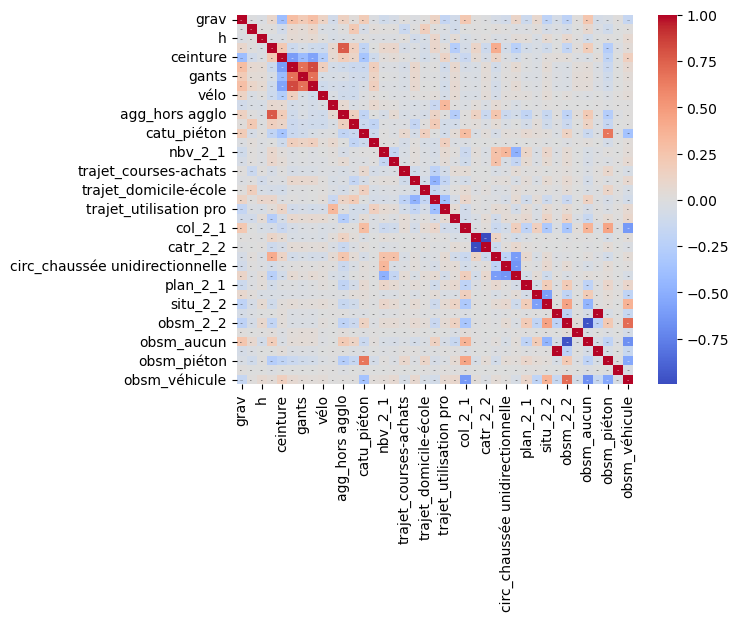

In [118]:
# Matrice de corrélation 
g = sns.heatmap(df_elem1_bin.corr(), cmap='coolwarm', annot=True, fmt=".2f",annot_kws={'size': 0.2})

In [119]:
# Regression linéaire avec l'ensemble des variables df_elem1
X = df_elem1_bin.drop('grav', axis=1)
y = df_elem1_bin['grav']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.351      
Dependent Variable:     grav                 AIC:                    669904.9181
Date:                   2023-12-20 17:07     BIC:                    670301.8974
No. Observations:       337449               Log-Likelihood:         -3.3492e+05
Df Model:               36                   F-statistic:            5068.      
Df Residuals:           337412               Prob (F-statistic):     0.00       
R-squared:              0.351                Scale:                  0.42623    
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            5.5842   0.0979  57.0459 0.0000  5.3923  5.7761
an_nais                         -0.0029   0.0001 -44.

In [120]:
#selection du meilleur nombr de covariables  à l'aide du R carré ajusté 
y = df_elem1_bin['grav']
X = df_elem1_bin.drop('grav', axis=1)
liste_r_carre_ajustes = []
for nb_variables in range(len(X.columns)):
    X_loop =  X.iloc[ :,:nb_variables+1]
    X_loop = sm.add_constant(X_loop)
    modele = sm.OLS(y,X_loop ).fit()
    liste_r_carre_ajustes.append(modele.rsquared_adj)

serie_r_carre_ajustes = pd.Series(liste_r_carre_ajustes)
serie_r_carre_ajustes.sort_values(ascending=False,)

36    0.350877
37    0.350876
35    0.350587
31    0.319557
32    0.319555
34    0.319555
33    0.319555
30    0.310754
29    0.308634
28    0.295957
27    0.293651
25    0.291505
26    0.291504
24    0.289604
23    0.289196
22    0.289188
21    0.289037
20    0.273690
19    0.269905
18    0.267709
17    0.262122
16    0.261771
15    0.261535
14    0.261407
13    0.256085
12    0.249621
11    0.247904
10    0.226823
9     0.224313
8     0.205831
7     0.200929
6     0.198735
5     0.197331
4     0.197275
3     0.192835
2     0.008288
1     0.000582
0     0.000040
dtype: float64

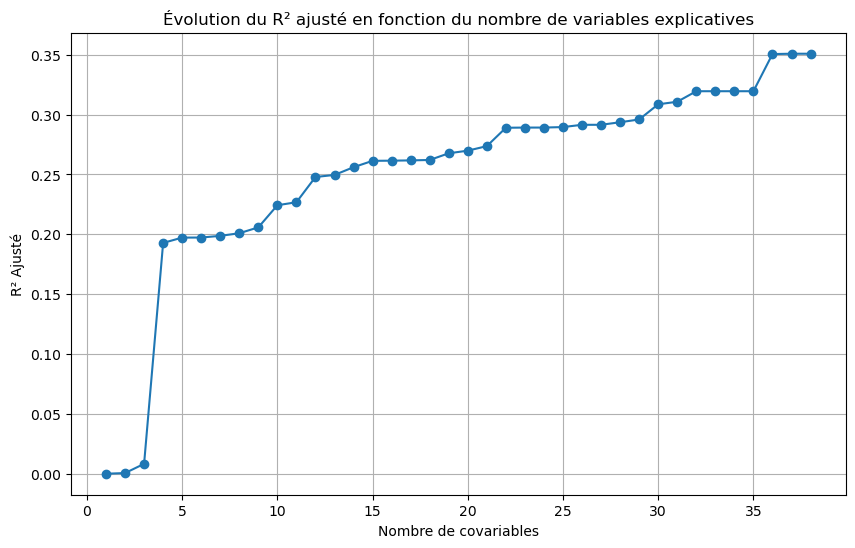

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(serie_r_carre_ajustes) + 1), serie_r_carre_ajustes, marker='o')
plt.title("Évolution du R² ajusté en fonction du nombre de variables explicatives")
plt.xlabel("Nombre de covariables")
plt.ylabel("R² Ajusté")
plt.grid(True)
plt.show()

Pour construire une régression linéaire avec le R-carré le plus élevé 
modèle plus pertinent : 

In [205]:
#nombre_de_covariables_le_plus_pertinent= serie_r_carre_ajustes.idxmax()
#X_R_carre_max=X.iloc[ :,:nombre_de_covariables_le_plus_pertinent]
#X_R_carre_max = sm.add_constant(X_R_carre_max)
#model = sm.OLS(y, X)
#results = model.fit()
#print(results.summary2())
#(modele.rsquared_adj)

                         Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.343      
Dependent Variable:      grav                 AIC:                    673831.2504
Date:                    2023-12-19 14:51     BIC:                    674196.0422
No. Observations:        337449               Log-Likelihood:         -3.3688e+05
Df Model:                33                   F-statistic:            5346.      
Df Residuals:            337415               Prob (F-statistic):     0.00       
R-squared:               0.343                Scale:                  0.43122    
---------------------------------------------------------------------------------
                                 Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
an_nais                         -0.0028   0.0001  -43.8205 0.0000 -0.0029 -0.0027
h                               -0.0037  

0.343272788871372

## KNeighbors #2

In [91]:
numeric_features = ["an_nais", "h", "vma"]
categorical_features = ["agg", "catu", "sexe", "nbv_2", "trajet", "lum_2", "col_2", 
                        "catr_2", "circ", "plan_2", "situ_2", "obsm_2", "ceinture"]


df_elem1 = df_merged[["grav"] + numeric_features + categorical_features]

df_elem1.dropna(inplace=True)

df_elem1

,grav,an_nais,h,vma,agg,catu,sexe,nbv_2,trajet,lum_2,col_2,catr_2,circ,plan_2,situ_2,obsm_2,ceinture
0,3.0,2008.0,16,50.0,agglo,conducteur,homme,0,promenade-loisirs,1,0,2,chausée bidirectionnelle,1,2,2,False
1,1.0,1948.0,16,50.0,agglo,conducteur,homme,0,promenade-loisirs,1,0,2,chausée bidirectionnelle,1,2,2,True
2,2.0,1988.0,8,50.0,agglo,conducteur,homme,0,autre,1,0,2,chausée bidirectionnelle,1,2,2,True
3,1.0,1970.0,8,50.0,agglo,conducteur,homme,0,utilisation pro,1,0,2,chausée bidirectionnelle,1,2,2,True
7,2.0,1967.0,18,30.0,agglo,piéton,femme,1,promenade-loisirs,1,1,2,chaussée unidirectionnelle,1,2,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494174,2.0,1968.0,9,130.0,hors agglo,passager,homme,1,promenade-loisirs,1,0,2,chaussée unidirectionnelle,1,2,2,True
494175,1.0,1972.0,7,90.0,hors agglo,conducteur,femme,0,domicile-travail,1,0,2,chaussée unidirectionnelle,1,2,2,True
494176,2.0,1964.0,7,90.0,hors agglo,conducteur,homme,0,domicile-travail,1,0,2,chaussée unidirectionnelle,1,2,2,True
494177,2.0,1988.0,7,90.0,hors agglo,conducteur,femme,0,domicile-travail,1,0,2,chaussée unidirectionnelle,1,2,2,True


In [93]:
numeric_features = ["an_nais", "h", "vma"]
categorical_features = ["agg", "catu", "sexe", "nbv", "trajet", "lum", "col", "manv", "motor", "choc",
                        "catr", "circ", "plan", "situ", "obsm", "ceinture"]

df_relevant = df_merged[["grav"] + numeric_features + categorical_features]

In [107]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Créer le pipeline SVC avec le préprocesseur
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=10))
])

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Évaluer le modèle sur les données de test
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.60


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.3f}")

KeyboardInterrupt: 

[Text(0.5225409836065574, 0.9166666666666666, 'ceinture_True <= 0.5\ngini = 0.639\nsamples = 395104\nvalue = [165633, 158239, 60779, 10453]'),
 Text(0.26229508196721313, 0.75, 'agg_hors agglo <= 0.5\ngini = 0.628\nsamples = 160953\nvalue = [29562, 84302, 40266, 6823]'),
 Text(0.13114754098360656, 0.5833333333333334, 'catv_2_véhicule léger <= 0.5\ngini = 0.58\nsamples = 117772\nvalue = [21850, 68969, 24222, 2731]'),
 Text(0.06557377049180328, 0.4166666666666667, 'obsm_piéton <= 0.5\ngini = 0.53\nsamples = 81081\nvalue = [10385, 51826, 17123, 1747]'),
 Text(0.03278688524590164, 0.25, 'catv_2_véhicule utilitaire <= 0.5\ngini = 0.502\nsamples = 67394\nvalue = [6294, 44661, 15095, 1344]'),
 Text(0.01639344262295082, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.04918032786885246, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09836065573770492, 0.25, 'catu_piéton <= 0.5\ngini = 0.614\nsamples = 13687\nvalue = [4091, 7165, 2028, 403]'),
 Text(0.08196721311475409, 0.08333333333333333, '\n  (

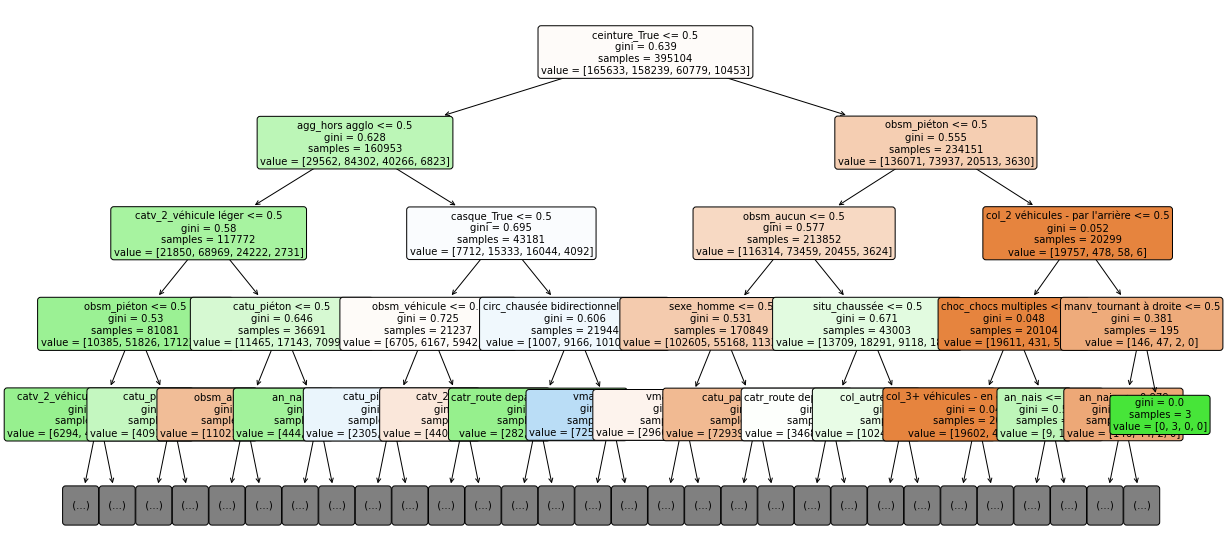

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, max_depth=4, fontsize=10)

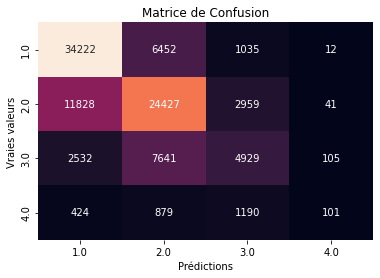

In [82]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

## Forêt aléatoire

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30, 
                               max_depth=20, 
                               random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test), model.score(X_train, y_train)

(0.6616013849377892, 0.7344496638859642)

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.3f}")

Cross-Validation Scores: [0.66501311 0.66254961 0.66362274 0.66111201 0.66267109]
Mean Accuracy: 0.663
